In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import gc
import io
import os

from IPython.display import display
pd.set_option('display.max_columns', 99)
pd.set_option('display.max_rows', 200)
pd.reset_option('display.float_format')
pd.set_option('display.max_colwidth', None)

from sitecustomize import ROOT # lib này được khởi tạo ban đầu dự án

import helpers.view as view
import helpers.EDA as EDA

importlib.reload(view)
importlib.reload(EDA)

<module 'helpers.EDA' from 'd:\\Data Science\\helpers\\EDA.py'>

In [71]:
def cache_clear():
    for var in list(globals()):  
        if var not in _keep_vars and not var.startswith("_"):  
            del globals()[var]  

    gc.collect()
_keep_vars = set(globals().keys())  # lưu biến gốc


# installments payments

In [72]:
installments = pd.read_pickle(ROOT + "/data/pkl/installments_payments.p")

In [73]:
prev = pd.read_pickle(ROOT + "/data/pkl/previous_application.p")

In [74]:
train = pd.read_pickle(ROOT + "/data/pkl/application_train.p")[["SK_ID_CURR", "TARGET"]]

In [75]:
# credit_balance = pd.read_pickle(ROOT + "/data/pkl/credit_card_balance.p")

In [76]:
installments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0            -1180             -1187.0        6948.360     6948.360  
1            -2156             -2156.0        1716.525     1716.525  
2              -63               -63.0       25425.000    25425.000  
3            -2418             -2426.0       24350.130    24350.130  
4            -1383             -1366.0        2165.040     2160.585

In [77]:
des = pd.read_pickle(ROOT + "/data/pkl/description.p")
des_installment = des[des["Table"] == "installments_payments"]

In [78]:
df_info = EDA.df_info(installments).reset_index()
df_merged = pd.merge(df_info, des_installment[["Row", "Description", "Special"]], 
                     left_on="index", right_on="Row", how="left").drop(columns=["Row"])
df_merged

Shape: (13605401, 8)


index DataType  #Nulls  #Uniques        Min          Mean  \
0              SK_ID_PREV    int64       0    997752  1000001.0  1.903365e+06   
1              SK_ID_CURR    int64       0    339587   100001.0  2.784449e+05   
2  NUM_INSTALMENT_VERSION  float64       0        65        0.0  8.566373e-01   
3   NUM_INSTALMENT_NUMBER    int64       0       277        1.0  1.887090e+01   
4         DAYS_INSTALMENT    int64       0      2922    -2922.0 -1.042270e+03   
5      DAYS_ENTRY_PAYMENT  float64    2905      3039    -4921.0 -1.051114e+03   
6          AMT_INSTALMENT  float64       0    902539        0.0  1.705091e+04   
7             AMT_PAYMENT  float64    2905    944235        0.0  1.723822e+04   

             Std          Max  \
0  536202.905546  2843499.000   
1  102718.310411   456255.000   
2       1.035216      178.000   
3      26.664067      277.000   
4     800.946284       -1.000   
5     800.585883       -1.000   
6   50570.254429  3771487.845   
7   54735.783981  3771487.845   

                                                                                  top10 val  \
0  2360056, 2592574, 1017477, 1449382, 1746731, 1690678, 2709164, 1383111, 1152155, 2543266   
1            145728, 296205, 453103, 189699, 186851, 172690, 418081, 192083, 434807, 217360   
2                                          1.0, 0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0, 8.0   
3                                                             1, 2, 3, 4, 5, 6, 7, 8, 9, 10   
4                                  -120, -180, -150, -119, -149, -210, -90, -148, -179, -59   
5               -91.0, -182.0, -154.0, -92.0, -245.0, -273.0, -119.0, -63.0, -153.0, -336.0   
6           9000.0, 2250.0, 4500.0, 6750.0, 3375.0, 5625.0, 7875.0, 1125.0, 13500.0, 8100.0   
7           9000.0, 2250.0, 4500.0, 6750.0, 3375.0, 5625.0, 1125.0, 7875.0, 13500.0, 8100.0   

                                                                         top10 cnt  \
0                                 293, 279, 248, 243, 236, 223, 222, 220, 219, 216   
1                                 372, 350, 347, 344, 337, 336, 332, 324, 323, 318   
2         8485004, 4082498, 620283, 237063, 55274, 48404, 17092, 16771, 8359, 7814   
3  1004160, 985716, 968279, 943502, 880007, 827973, 679739, 644708, 592473, 549140   
4             11512, 11212, 11194, 11183, 11144, 11140, 11135, 10922, 10838, 10828   
5             13103, 13090, 13071, 12646, 12405, 12151, 11961, 11938, 11839, 11839   
6        254062, 179120, 174143, 173659, 149941, 96362, 60248, 60224, 42926, 37295   
7        248757, 182654, 178309, 170360, 141832, 91165, 64440, 55823, 46276, 35271   

                                                            top10 ratio  \
0                      0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0   
1                      0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0   
2    0.624, 0.3, 0.046, 0.017, 0.004, 0.004, 0.001, 0.001, 0.001, 0.001   
3    0.074, 0.072, 0.071, 0.069, 0.065, 0.061, 0.05, 0.047, 0.044, 0.04   
4  0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001   
5  0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001   
6  0.019, 0.013, 0.013, 0.013, 0.011, 0.007, 0.004, 0.004, 0.003, 0.003   
7   0.018, 0.013, 0.013, 0.013, 0.01, 0.007, 0.005, 0.004, 0.003, 0.003   

                                                                                                                                                                                  Description  \
0                                                                                                                                                                                         NaN   
1                                                                                                                                                                    ID of loan in our sample   
2  Version of installment calendar (0 is for credit card) of previous credit. Change of installment versio

In [79]:
tmp = installments.copy().sort_values(["SK_ID_PREV", "DAYS_ENTRY_PAYMENT"], ascending=[True, True]).reset_index() # nhóm theo ID_PREV và sắp xếp ngày trả thực thế từ xa đến ngày gần nhất

In [80]:
tmp["index"] = tmp.index

In [81]:
_keep_vars.update({"installments", "train", "prev", "tmp"})
cache_clear()

# missing value

## AMT_INSTALMENT

In [82]:
prev["exist"] = 1
merged_df = pd.merge(
    tmp[tmp["SK_ID_PREV"].isin(tmp[(tmp["AMT_INSTALMENT"]==0) | (tmp["AMT_INSTALMENT"].isnull())]["SK_ID_PREV"].unique())], 
    prev[["SK_ID_PREV", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "DAYS_DECISION", "NAME_PAYMENT_TYPE","NAME_CONTRACT_STATUS", "CNT_PAYMENT", "exist"]],
    on="SK_ID_PREV", 
    how="left"
)
merged_df = merged_df.merge(
    train,
    on="SK_ID_CURR",
    how="left"
)
view.html_view(merged_df)


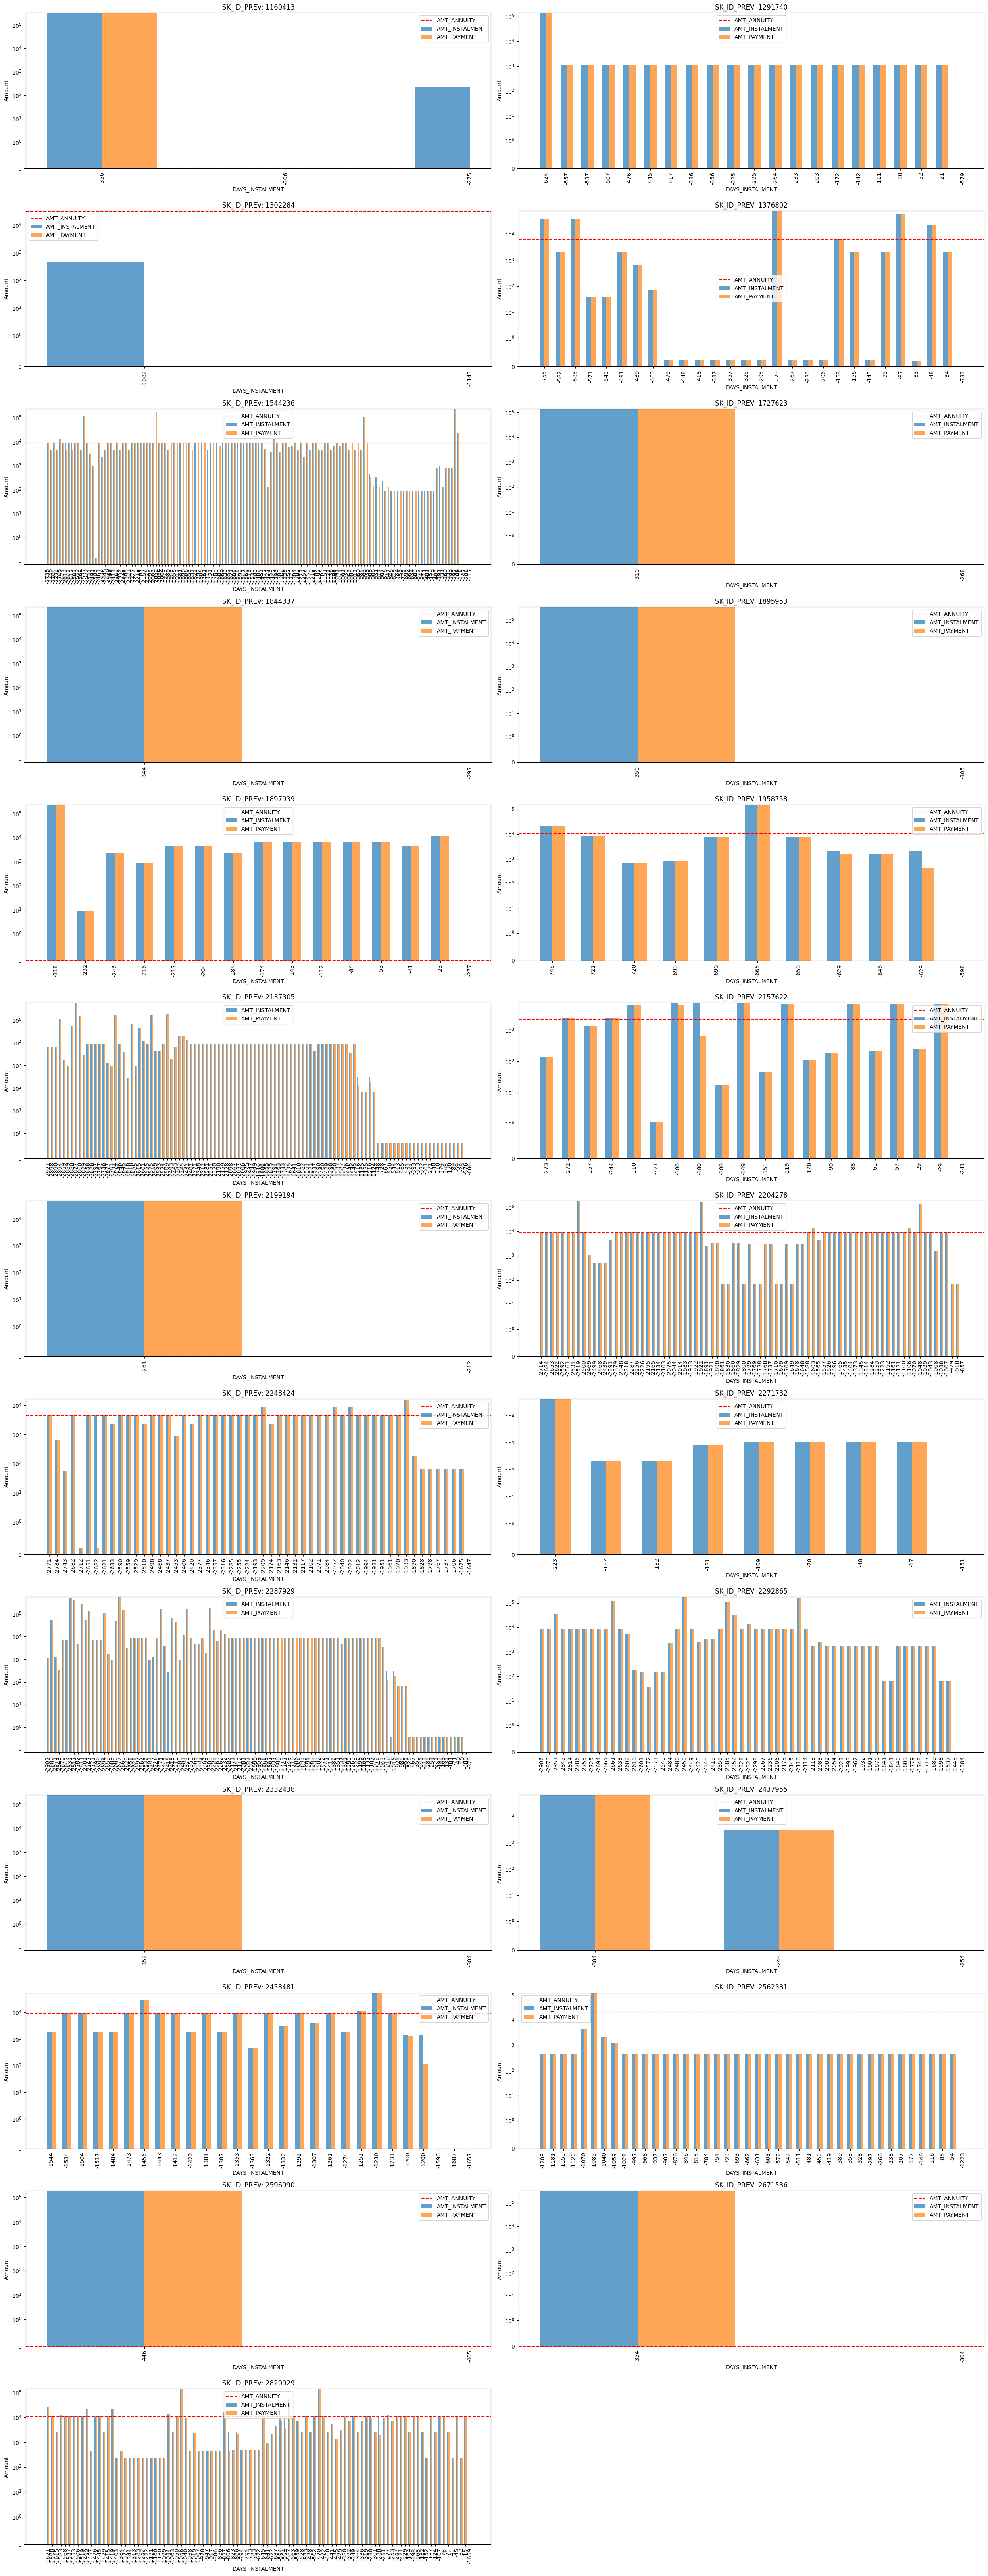

In [83]:
unique_ids = merged_df[merged_df["NUM_INSTALMENT_VERSION"] == 0]["SK_ID_PREV"].unique()
n_ids = len(unique_ids)

n_cols = 2
n_rows = int(np.ceil(n_ids / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 5 * n_rows))
axes = axes.flatten()

for i, sk_id in enumerate(unique_ids):
    sub_df = merged_df[merged_df["SK_ID_PREV"] == sk_id]

    ax = axes[i]
    x = np.arange(len(sub_df["DAYS_INSTALMENT"])) 
    width = 0.3

    ax.bar(x - width / 2, sub_df["AMT_INSTALMENT"], width=width, label="AMT_INSTALMENT", alpha=0.7)
    ax.bar(x + width / 2, sub_df["AMT_PAYMENT"], width=width, label="AMT_PAYMENT", alpha=0.7)

    if not sub_df["AMT_ANNUITY"].isnull().all():
        annuity_value = sub_df["AMT_ANNUITY"].iloc[0]
        ax.axhline(y=annuity_value, color="red", linestyle="--", label="AMT_ANNUITY")

    ax.set_xticks(x)
    ax.set_xticklabels(sub_df["DAYS_INSTALMENT"], rotation=90)

    ax.set_xlabel("DAYS_INSTALMENT")
    ax.set_ylabel("Amount")
    ax.set_yscale("symlog", linthresh=1) # scale log
    ax.set_title(f"SK_ID_PREV: {sk_id}")
    ax.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
buf = io.BytesIO()
plt.savefig(buf, format='png', bbox_inches='tight')
plt.close(fig)
view.html_view_image(buf)


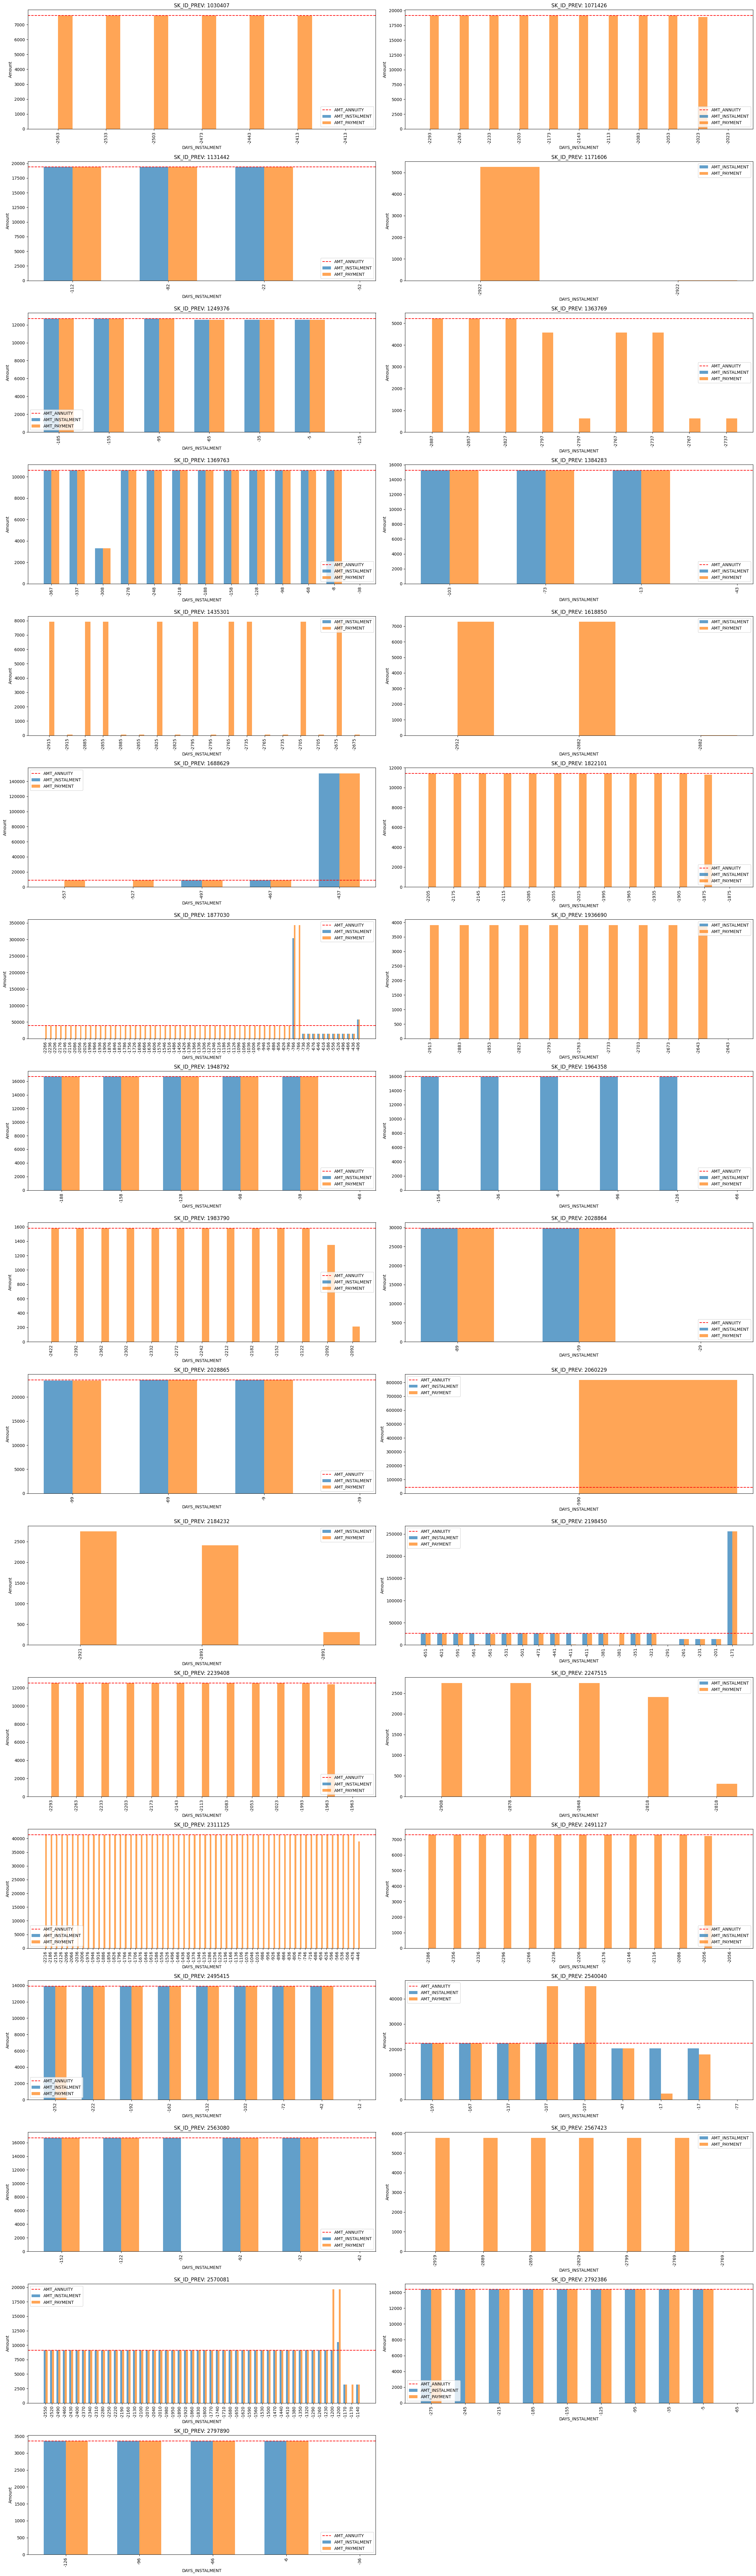

In [84]:
unique_ids = merged_df[merged_df["NUM_INSTALMENT_VERSION"] != 0]["SK_ID_PREV"].unique()
n_ids = len(unique_ids)
n_cols = 2 
n_rows = int(np.ceil(n_ids / n_cols)) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 5 * n_rows))
axes = axes.flatten()
for i, sk_id in enumerate(unique_ids):
    sub_df = merged_df[merged_df["SK_ID_PREV"] == sk_id]

    ax = axes[i]
    x = np.arange(len(sub_df["DAYS_INSTALMENT"]))
    width = 0.3

    ax.bar(x - width / 2, sub_df["AMT_INSTALMENT"], width=width, label="AMT_INSTALMENT", alpha=0.7)
    ax.bar(x + width / 2, sub_df["AMT_PAYMENT"], width=width, label="AMT_PAYMENT", alpha=0.7)
    if not sub_df["AMT_ANNUITY"].isnull().all(): 
        annuity_value = sub_df["AMT_ANNUITY"].iloc[0]
        ax.axhline(y=annuity_value, color="red", linestyle="--", label="AMT_ANNUITY")

    ax.set_xticks(x)
    ax.set_xticklabels(sub_df["DAYS_INSTALMENT"], rotation=90)

    ax.set_xlabel("DAYS_INSTALMENT")
    ax.set_ylabel("Amount")
    # ax.set_yscale("symlog", linthresh=1)
    ax.set_title(f"SK_ID_PREV: {sk_id}")
    ax.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
buf = io.BytesIO()
plt.savefig(buf, format='png', bbox_inches='tight')
plt.close(fig)
view.html_view_image(buf)

các trường hợp có thể khiến AMT_INSTALMENT = 0 hoặc null (AMT_INSTALMENT là khoản trả góp định kỳ) [ta liên hệ với cả các lần trả góp liên quan tới khoản vay chứa INSTALMENT = 0]:
* Miss value. Có thể fill bằng cách join từ prev.AMT_ANNUITY, nhưng cần đề phòng: 
* * trường hợp trả nhiều hơn định kỳ khiến các kỳ sang INSTALMENT giảm xuống ; 
* * thay đổi parameter version khoản vay khiến INSTALMENT thay đổi ; 
* * khoản vay không tồn tại thông tin trong prev
* Các khoản vay tín dụng:
* * prev_ANNUITY = 0 hoặc null, CNT_PAYMENT = 0 (số tháng trả góp theo lý thuyết). Có thể tín dụng không hạn mức? Trong trường hợp này, khoản trả góp định kỳ không cố định (vì liên hệ tới các tháng khác của khoản vay đó, ta thấy có những INSTALMENT và PAYMENT không cố định). Thêm nữa, bộ dữ liệu Home Credit đa phân thu thập từ khu vực ĐNÁ, nơi mà khái niệm tín dụng kiểu này không phổ biến, dẫn đến phân bổ tín dụng không đều (có tháng rất nhiều, có tháng rất ít)
* * prev_ANNUITY > 0. Ta thấy người dùng có xu hướng sử dụng INSTALMENT (số tiền tín dụng phải trả) ~ ANNUITY (Sử dụng tín dụng dưới hạn mức dẫn đến chỉ phải trả lãi suất tối thiểu. Mặc dù vẫn có những tháng vượt hạn mức nhưng thưa thớt)
* Các khoản vay khác (version != 0):
* * (trục x xét theo DAYS_INSTALMENT nên sẽ có trường hợp thanh toán nhiều hơn 1 lần cho một khoản trả góp định kỳ của tháng đó, nếu sum group sẽ nhận được đủ số tiền)
* * Có xu hướng thanh toán đồng đều (giữa các tháng hoặc với ANNUITY) trả góp hơn vay tín dụng. Vì là các khoản vay tiêu dùng trả góp, giá trị PAYMENT đều đặn đó rất có thể là INSTALMENT. Mặt khác ta thấy sự thiếu hụt của AMT_INSTALMENT ==> AMT_INSTALMENT của các khoản vay khác chính là missing value, ta fill bằng ANNUITY trong trường hợp có AMT_PAYMENT
* * Có 2 xu hướng chính: đều đặn hoặc trả vượt mức trả góp để giảm thời gian và lãi suất

* AMT_PAYMENT = 0 hoặc null cũng có thể khiến AMT_INSTALMENT = 0 hoặc null

In [85]:
### fill nan

median_instalment = merged_df.groupby("SK_ID_PREV")["AMT_INSTALMENT"].transform("median")

payment_sum = merged_df.groupby(["SK_ID_PREV", "NUM_INSTALMENT_NUMBER"])["AMT_PAYMENT"].sum() # vì có nhiều lần trả cho một INSTALMENT nên lấy sum
median_payment = merged_df["SK_ID_PREV"].map(payment_sum.groupby("SK_ID_PREV").median()) 
median_annuity = pd.Series(
    np.where(
        (median_instalment == 0) | median_instalment.isna(),   # annuity = null => lấy trung vị instalment => instalment = null lấy trung vị payment
        median_payment,  
        median_instalment  
    ),
    index=merged_df.index
)
merged_df["AMT_ANNUITY"] = merged_df["AMT_ANNUITY"].fillna(median_annuity)

mask = (merged_df["NUM_INSTALMENT_VERSION"] != 0) & (merged_df["AMT_PAYMENT"] > 0) # chỉ lấy những bản ghi có PAYMENT
merged_df.loc[mask, "AMT_INSTALMENT"] = merged_df.loc[mask, "AMT_INSTALMENT"].replace(0, np.nan)
merged_df["AMT_INSTALMENT"] = merged_df["AMT_INSTALMENT"].fillna(merged_df["AMT_ANNUITY"])


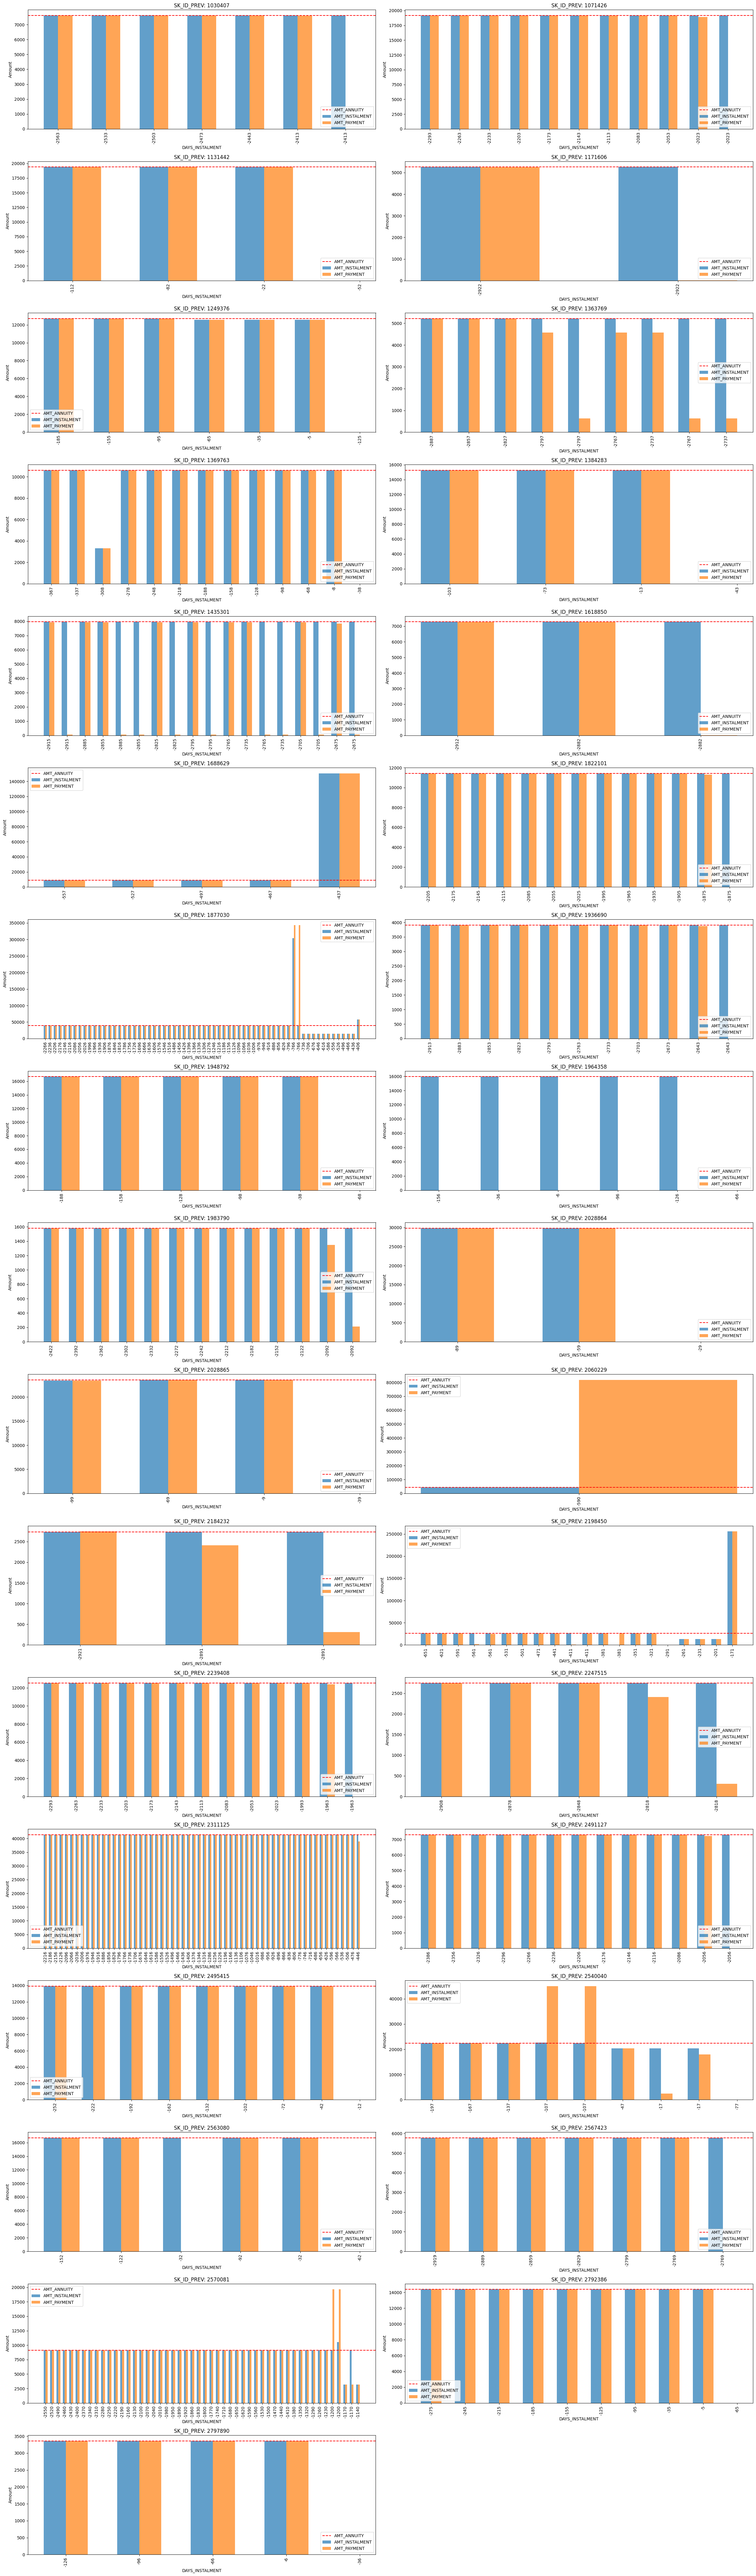

In [86]:
unique_ids = merged_df[merged_df["NUM_INSTALMENT_VERSION"] != 0]["SK_ID_PREV"].unique()
n_ids = len(unique_ids)
n_cols = 2 
n_rows = int(np.ceil(n_ids / n_cols)) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 5 * n_rows))
axes = axes.flatten()
for i, sk_id in enumerate(unique_ids):
    sub_df = merged_df[merged_df["SK_ID_PREV"] == sk_id]

    ax = axes[i]
    x = np.arange(len(sub_df["DAYS_INSTALMENT"]))
    width = 0.3

    ax.bar(x - width / 2, sub_df["AMT_INSTALMENT"], width=width, label="AMT_INSTALMENT", alpha=0.7)
    ax.bar(x + width / 2, sub_df["AMT_PAYMENT"], width=width, label="AMT_PAYMENT", alpha=0.7)
    if not sub_df["AMT_ANNUITY"].isnull().all(): 
        annuity_value = sub_df["AMT_ANNUITY"].iloc[0]
        ax.axhline(y=annuity_value, color="red", linestyle="--", label="AMT_ANNUITY")

    ax.set_xticks(x)
    ax.set_xticklabels(sub_df["DAYS_INSTALMENT"], rotation=90)

    ax.set_xlabel("DAYS_INSTALMENT")
    ax.set_ylabel("Amount")
    # ax.set_yscale("symlog", linthresh=1)
    ax.set_title(f"SK_ID_PREV: {sk_id}")
    ax.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
buf = io.BytesIO()
plt.savefig(buf, format='png', bbox_inches='tight')
plt.close(fig)
view.html_view_image(buf)

In [87]:
merged_df = merged_df.rename(columns={"AMT_INSTALMENT": "filled_AMT_INSTALMENT"}) # đổi tên cột và index thành cột

In [88]:
merged_df[merged_df["NUM_INSTALMENT_VERSION"]!=0][["index", "SK_ID_PREV", "filled_AMT_INSTALMENT"]]

index  SK_ID_PREV  filled_AMT_INSTALMENT
0       265051     1030407               7616.655
1       265052     1030407               7616.655
2       265053     1030407               7616.655
3       265054     1030407               7616.655
4       265055     1030407               7616.655
...        ...         ...                    ...
1160  13269555     2797890               3356.865
1161  13269556     2797890               3356.865
1162  13269557     2797890               3356.865
1163  13269558     2797890               3356.865
1164  13269559     2797890                  0.000

[414 rows x 3 columns]

In [89]:
tmp = tmp.merge(
    merged_df[merged_df["NUM_INSTALMENT_VERSION"]!=0][["index", "SK_ID_PREV", "filled_AMT_INSTALMENT"]],
    on=["index", "SK_ID_PREV"],  
    how="left"
)

In [90]:
tmp.shape # oke

(13605401, 10)

In [91]:
tmp.loc[~tmp["filled_AMT_INSTALMENT"].isnull(), "AMT_INSTALMENT"] = tmp["filled_AMT_INSTALMENT"]

In [92]:
tmp = tmp.drop(["filled_AMT_INSTALMENT"], axis=1)

In [93]:
view.html_view(tmp[tmp["AMT_INSTALMENT"]==0])

In [94]:
cache_clear()

## AMT_PAYMENT

In [95]:
view.html_view(tmp[((tmp["AMT_PAYMENT"].isnull()) | (tmp["AMT_PAYMENT"] == 0)) ])

# feature engineering

In [96]:
tmp["days_delayed_payment"] = tmp["DAYS_ENTRY_PAYMENT"] - tmp["DAYS_INSTALMENT"]

tmp["AMT_PAYMENT-s-AMT_INSTALMENT"] = tmp["AMT_PAYMENT"] - tmp["AMT_INSTALMENT"] # chênh lệch giữa số tiền trả thực tế và số tiền phải trả theo quy định
tmp["AMT_PAYMENT-d-AMT_INSTALMENT"] = tmp["AMT_PAYMENT"] / tmp["AMT_INSTALMENT"] # tỉ lệ giữa số tiền trả thực tế và số tiền phải trả theo quy định

tmp["days_weighted_delayed_payment"] = tmp["days_delayed_payment"] * tmp["AMT_PAYMENT-d-AMT_INSTALMENT"] # delay trả góp * tỉ lệ trả đủ (trọng số)
tmp["days_weighted_delay_tsw3"] = tmp['days_weighted_delayed_payment'] * (1 + (tmp['DAYS_ENTRY_PAYMENT'] * 0.0003)) # time series weight decay = 0.0003

# Days past due and days before due (không lấy giá trị âm)
tmp['DPD'] = tmp['DAYS_ENTRY_PAYMENT'] - tmp['DAYS_INSTALMENT']
tmp['DBD'] = tmp['DAYS_INSTALMENT'] - tmp['DAYS_ENTRY_PAYMENT']
tmp['DPD'] = tmp['DPD'].apply(lambda x: x if x > 0 else 0)
tmp['DBD'] = tmp['DBD'].apply(lambda x: x if x > 0 else 0)

In [97]:
view.html_view(tmp.head(100))

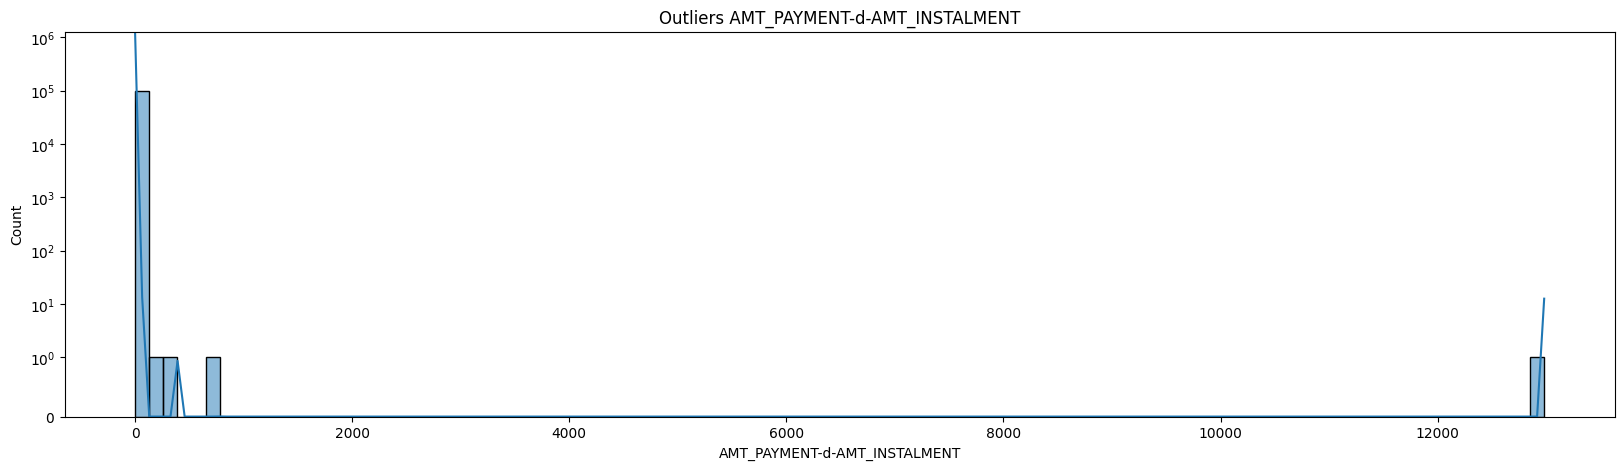

In [98]:
plt.figure(figsize=(20, 5))
sns.histplot(tmp["AMT_PAYMENT-d-AMT_INSTALMENT"].sample(n=100000), bins=100, kde=True)
plt.yscale("symlog", linthresh=1) # loga tần suất
plt.title("Outliers AMT_PAYMENT-d-AMT_INSTALMENT")
plt.show()

In [99]:
tmp["AMT_PAYMENT-d-AMT_INSTALMENT"].max() # max PAYMENT/INSTALMENT

np.float64(194250.0)

In [100]:
tmp[tmp["SK_ID_PREV"]==1720477]

index  SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
5558326  5558326     1720477      208684                     2.0   
5558327  5558327     1720477      208684                     1.0   
5558328  5558328     1720477      208684                     3.0   
5558329  5558329     1720477      208684                     3.0   
5558330  5558330     1720477      208684                     4.0   

         NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
5558326                      1             -564              -566.0   
5558327                      1             -564              -566.0   
5558328                      2             -534              -535.0   
5558329                      3             -504              -511.0   
5558330                      4             -474              -491.0   

         AMT_INSTALMENT  AMT_PAYMENT  days_delayed_payment  \
5558326           0.090    17482.500                  -2.0   
5558327       17482.410    17482.500                  -2.0   
5558328       17482.410    17482.410                  -1.0   
5558329       17482.410    17482.410                  -7.0   
5558330       50522.085    50522.085                 -17.0   

         AMT_PAYMENT-s-AMT_INSTALMENT  AMT_PAYMENT-d-AMT_INSTALMENT  \
5558326                      17482.41                 194250.000000   
5558327                          0.09                      1.000005   
5558328                          0.00                      1.000000   
5558329                          0.00                      1.000000   
5558330                          0.00                      1.000000   

         days_weighted_delayed_payment  days_weighted_delay_tsw3  DPD   DBD  
5558326                  -388500.00000            -322532.700000  0.0   2.0  
5558327                       -2.00001                 -1.660409  0.0   2.0  
5558328                       -1.00000                 -0.839500  0.0   1.0  
5558329                       -7.00000                 -5.926900  0.0   7.0  
5558330                      -17.00000                -14.495900  0.0  17.0

In [101]:
prev[prev["SK_ID_PREV"]==1720477]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
94019     1720477      208684         Cash loans     17482.41   

       AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
94019          90000.0     92970.0               NaN          90000.0   

      WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
94019                     FRIDAY                       15   

      FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
94019                           Y                       1                NaN   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE  \
94019                    NaN                       NaN                    XNA   

      NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
94019             Approved           -594  Cash through the bank   

      CODE_REJECT_REASON NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  \
94019                XAP            None        Refreshed                 XNA   

      NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  \
94019           Cash            x-sell  Credit and cash offices   

       SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
94019                -1                  XNA          6.0           middle   

       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
94019  Cash X-Sell: middle            365243.0          -564.0   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
94019                     -414.0         -474.0            -466.0   

       NFLAG_INSURED_ON_APPROVAL  exist  
94019                        1.0      1

* trả nhiều số tiền định kỳ (mục đích là do đổi chỉ số khoản vay NUM_INSTALMENT_VERSION, trả nhiều hơn để giảm lãi suất, giảm số tháng vay lãi...)

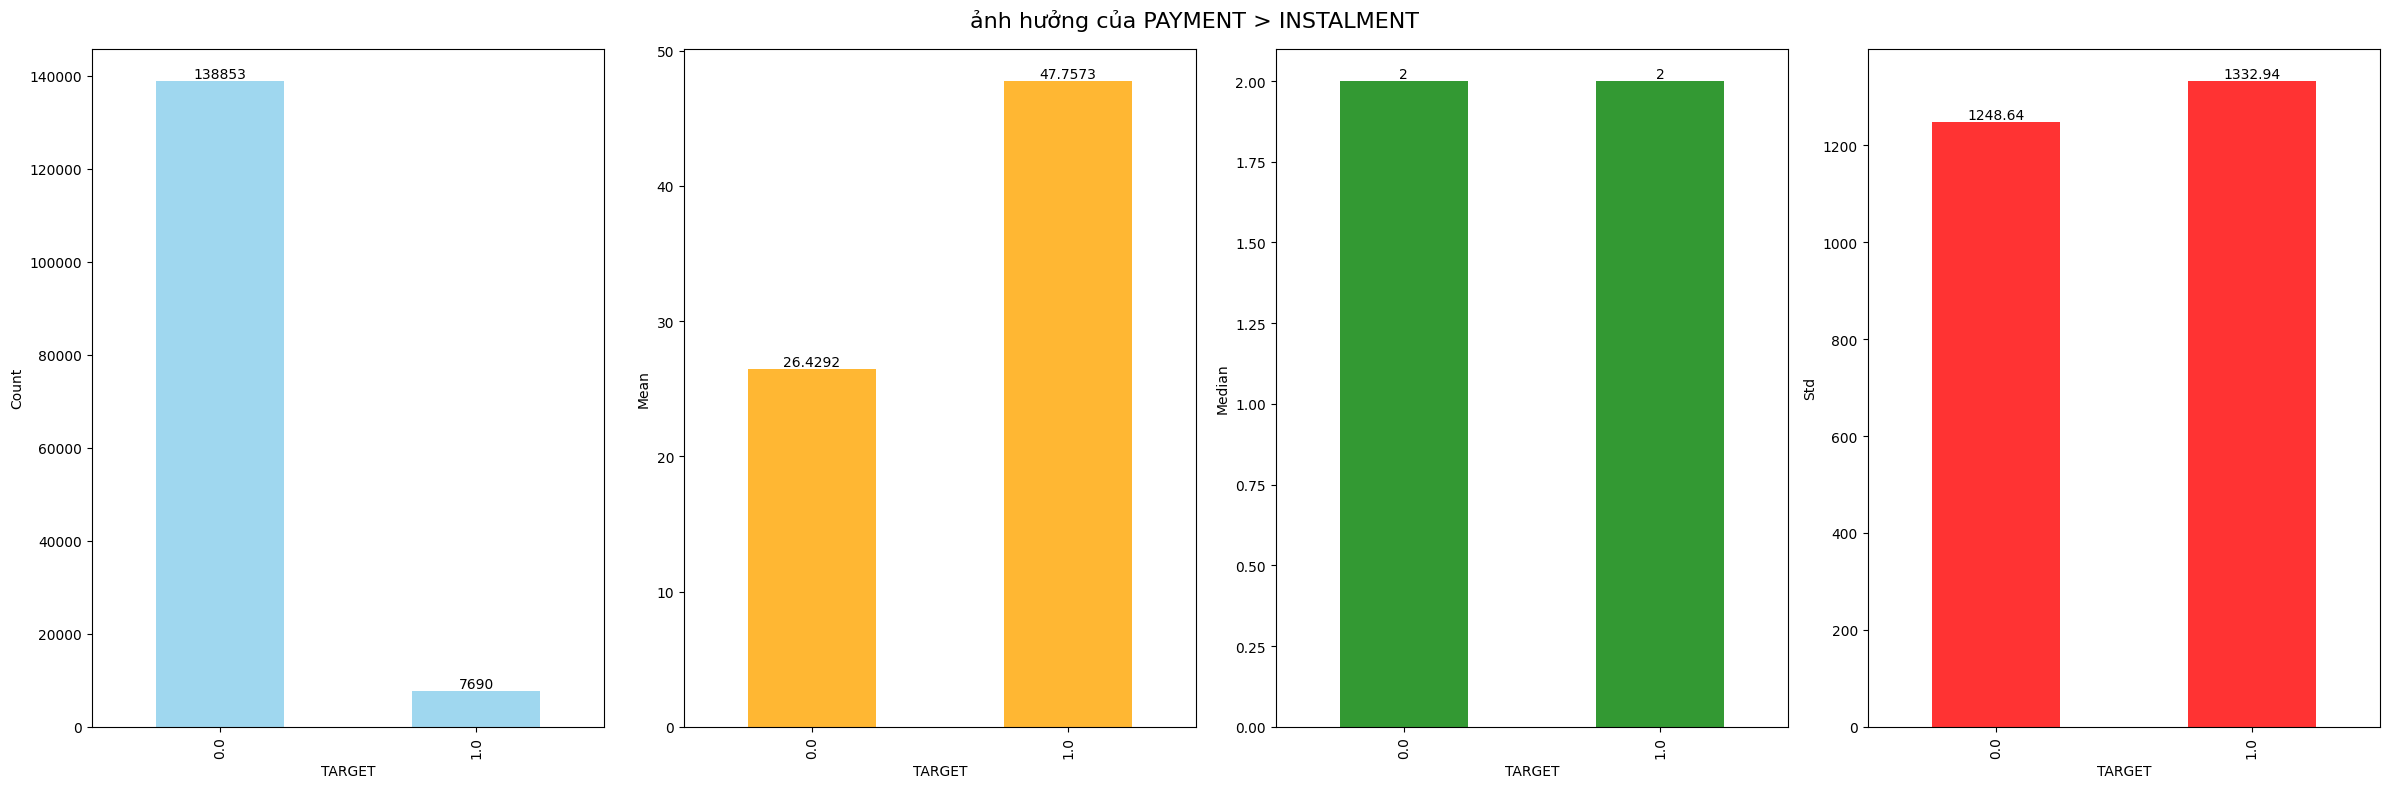

In [102]:
fig, axes = plt.subplots(1, 4, figsize=(24, 8))
fig.suptitle("ảnh hưởng của PAYMENT > INSTALMENT", fontsize=16)

result = tmp[(tmp["AMT_PAYMENT-d-AMT_INSTALMENT"]>1)].merge(train, on="SK_ID_CURR", how="left")
result.groupby("TARGET")["AMT_PAYMENT-d-AMT_INSTALMENT"].count().plot(kind="bar", ax=axes[0], color="skyblue", alpha=0.8)
axes[0].set_ylabel("Count")
axes[0].bar_label(axes[0].containers[0])

result.groupby("TARGET")["AMT_PAYMENT-d-AMT_INSTALMENT"].mean().plot(kind="bar", ax=axes[1], color="orange", alpha=0.8)
axes[1].set_ylabel("Mean")
axes[1].bar_label(axes[1].containers[0])

result.groupby("TARGET")["AMT_PAYMENT-d-AMT_INSTALMENT"].median().plot(kind="bar", ax=axes[2], color="green", alpha=0.8)
axes[2].set_ylabel("Median")
axes[2].bar_label(axes[2].containers[0])

result.groupby("TARGET")["AMT_PAYMENT-d-AMT_INSTALMENT"].std().plot(kind="bar", ax=axes[3], color="red", alpha=0.8)
axes[3].set_ylabel("Std")
axes[3].bar_label(axes[3].containers[0])

plt.tight_layout()
plt.show()

* PAYMENT/INSTALMENT > 1 tồn tại giá trị lớn (outlier) ở hồ sơ rủi ro hơn. 
* Nhưng xu hướng như nhau (median)
* Dữ liệu ở nhóm này phân tán không đều

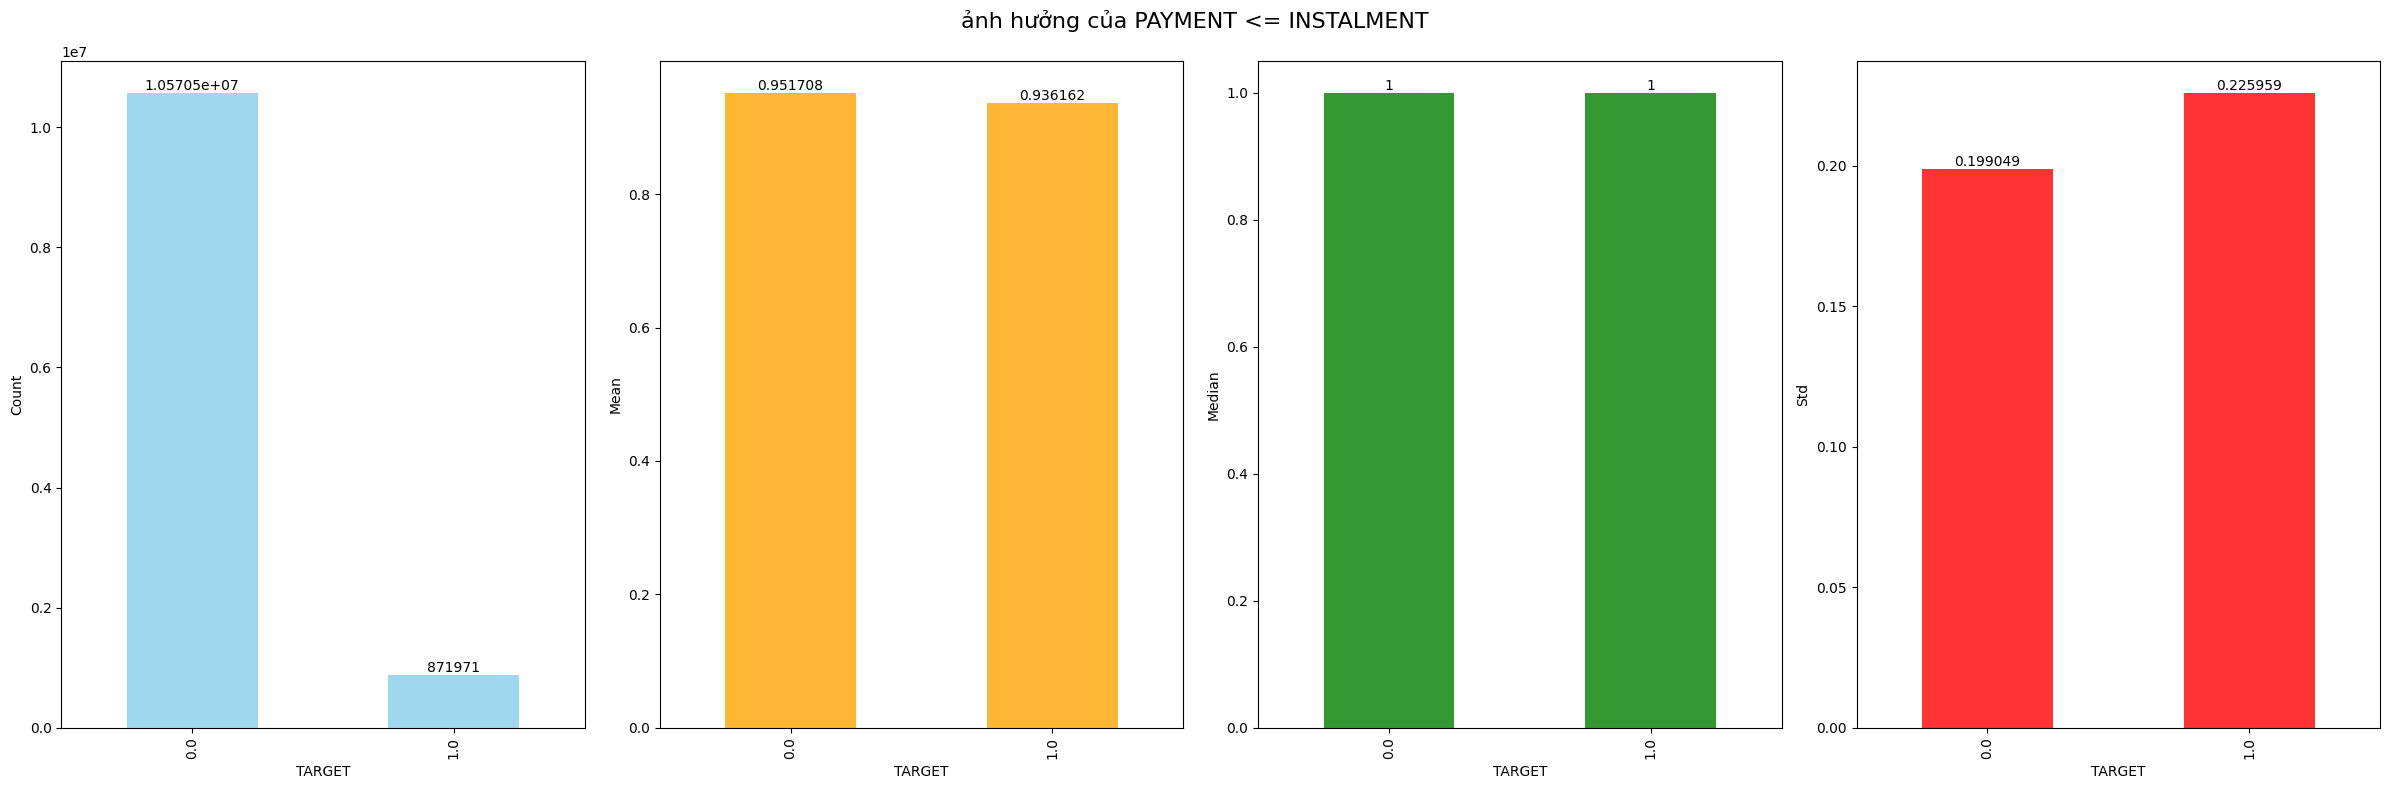

In [103]:
fig, axes = plt.subplots(1, 4, figsize=(24, 8))
fig.suptitle("ảnh hưởng của PAYMENT <= INSTALMENT", fontsize=16)

result = tmp[(tmp["AMT_PAYMENT-d-AMT_INSTALMENT"]<=1)].merge(train, on="SK_ID_CURR", how="left")
result.groupby("TARGET")["AMT_PAYMENT-d-AMT_INSTALMENT"].count().plot(kind="bar", ax=axes[0], color="skyblue", alpha=0.8)
axes[0].set_ylabel("Count")
axes[0].bar_label(axes[0].containers[0])

result.groupby("TARGET")["AMT_PAYMENT-d-AMT_INSTALMENT"].mean().plot(kind="bar", ax=axes[1], color="orange", alpha=0.8)
axes[1].set_ylabel("Mean")
axes[1].bar_label(axes[1].containers[0])

result.groupby("TARGET")["AMT_PAYMENT-d-AMT_INSTALMENT"].median().plot(kind="bar", ax=axes[2], color="green", alpha=0.8)
axes[2].set_ylabel("Median")
axes[2].bar_label(axes[2].containers[0])

result.groupby("TARGET")["AMT_PAYMENT-d-AMT_INSTALMENT"].std().plot(kind="bar", ax=axes[3], color="red", alpha=0.8)
axes[3].set_ylabel("Std")
axes[3].bar_label(axes[3].containers[0])

plt.tight_layout()
plt.show()

In [104]:
cache_clear()

# xét hồ sơ có hành vi trả góp nhiều lần cho 1 NUM_INSTALMENT_NUMBER

* curr_id = 176456 có 2 lần NUM_INSTALMENT_NUMBER = 9  
==>  tháng đó trả 2 lần, một lần thiếu nên trả thêm lần nữa, tổng số tiền 2 lần trả trong một instalment bằng số tiền phải trả định kỳ tháng đó.


(có nên group by NUM_INSTALMENT_NUMBER?)

## xét ratio = NUM_INSTALMENT_NUMBER / CNT_PAYMENT

In [105]:
prev[prev["SK_ID_CURR"]==176456].head(5)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
23289     1000005      176456     Consumer loans    14713.605   

       AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
23289       123486.075    120307.5         12349.575       123486.075   

      WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
23289                   THURSDAY                       13   

      FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
23289                           Y                       1           0.101388   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE  \
23289                    NaN                       NaN                    XAP   

      NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
23289             Approved          -1719  Cash through the bank   

      CODE_REJECT_REASON NAME_TYPE_SUITE NAME_CLIENT_TYPE  \
23289                XAP          Family              New   

          NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE CHANNEL_TYPE  \
23289  Construction Materials            POS               XNA        Stone   

       SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
23289              1877         Construction         10.0           middle   

              PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
23289  POS industry with interest            365243.0         -1688.0   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
23289                    -1418.0        -1418.0           -1415.0   

       NFLAG_INSURED_ON_APPROVAL  exist  
23289                        0.0      1

In [106]:
tmp[tmp["SK_ID_CURR"]==176456]

index  SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
16     16     1000005      176456                     1.0   
17     17     1000005      176456                     1.0   
18     18     1000005      176456                     1.0   
19     19     1000005      176456                     1.0   
20     20     1000005      176456                     1.0   
21     21     1000005      176456                     1.0   
22     22     1000005      176456                     1.0   
23     23     1000005      176456                     1.0   
24     24     1000005      176456                     1.0   
25     25     1000005      176456                     1.0   
26     26     1000005      176456                     1.0   

    NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
16                      1            -1688             -1687.0   
17                      2            -1658             -1664.0   
18                      3            -1628             -1636.0   
19                      4            -1598             -1606.0   
20                      5            -1568             -1575.0   
21                      6            -1538             -1545.0   
22                      7            -1508             -1512.0   
23                      8            -1478             -1484.0   
24                      9            -1448             -1484.0   
25                      9            -1448             -1445.0   
26                     10            -1418             -1433.0   

    AMT_INSTALMENT  AMT_PAYMENT  days_delayed_payment  \
16       14713.605    14713.605                   1.0   
17       14713.605    14713.605                  -6.0   
18       14713.605    14713.605                  -8.0   
19       14713.605    14713.605                  -8.0   
20       14713.605    14713.605                  -7.0   
21       14713.605    14713.605                  -7.0   
22       14713.605    14713.605                  -4.0   
23       14713.605    14713.605                  -6.0   
24       14713.605        2.790                 -36.0   
25       14713.605    14710.815                   3.0   
26       14599.260    14599.260                 -15.0   

    AMT_PAYMENT-s-AMT_INSTALMENT  AMT_PAYMENT-d-AMT_INSTALMENT  \
16                         0.000                       1.00000   
17                         0.000                       1.00000   
18                         0.000                       1.00000   
19                         0.000                       1.00000   
20                         0.000                       1.00000   
21                         0.000                       1.00000   
22                         0.000                       1.00000   
23                         0.000                       1.00000   
24                    -14710.815                       0.00019   
25                        -2.790                       0.99981   
26                         0.000                       1.00000   

    days_weighted_delayed_payment  days_weighted_delay_tsw3  DPD   DBD  
16                       1.000000                  0.493900  1.0   0.0  
17                      -6.000000                 -3.004800  0.0   6.0  
18                      -8.000000                 -4.073600  0.0   8.0  
19                      -8.000000                 -4.145600  0.0   8.0  
20                      -7.000000                 -3.692500  0.0   7.0  
21                      -7.000000                 -3.755500  0.0   7.0  
22                      -4.000000                 -2.185600  0.0   4.0  
23                      -6.000000                 -3.328800  0.0   6.0  
24                      -0.006826                 -0.003787  0.0  36.0  
25                       2.999431                  1.699178  3.0   0.0  
26                     -15.000000                 -8.551500  0.0  15.0

In [107]:
prev[prev["SK_ID_PREV"]==2360056]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
38620     2360056      453103    Revolving loans       5625.0   

       AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
38620              0.0    112500.0               NaN              NaN   

      WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
38620                    TUESDAY                       18   

      FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
38620                           Y                       1                NaN   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE  \
38620                    NaN                       NaN                    XAP   

      NAME_CONTRACT_STATUS  DAYS_DECISION NAME_PAYMENT_TYPE  \
38620             Approved          -2904               XNA   

      CODE_REJECT_REASON NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  \
38620                XAP            None         Repeater                 XNA   

      NAME_PORTFOLIO NAME_PRODUCT_TYPE CHANNEL_TYPE  SELLERPLACE_AREA  \
38620          Cards            x-sell        Stone               180   

       NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP PRODUCT_COMBINATION  \
38620  Consumer electronics          0.0              XNA         Card Street   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
38620             -2886.0         -2825.0                   365243.0   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  exist  
38620       365243.0          365243.0                        0.0      1

In [108]:
tmp[tmp["SK_ID_PREV"]==2360056]

index  SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
10141120  10141120     2360056      453103                     0.0   
10141121  10141121     2360056      453103                     0.0   
10141122  10141122     2360056      453103                     0.0   
10141123  10141123     2360056      453103                     0.0   
10141124  10141124     2360056      453103                     0.0   
...            ...         ...         ...                     ...   
10141408  10141408     2360056      453103                     0.0   
10141409  10141409     2360056      453103                     0.0   
10141410  10141410     2360056      453103                     0.0   
10141411  10141411     2360056      453103                     0.0   
10141412  10141412     2360056      453103                     0.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
10141120                      1            -2825             -2853.0   
10141121                      2            -2853             -2853.0   
10141122                      3            -2839             -2839.0   
10141123                      5            -2812             -2812.0   
10141124                      4            -2794             -2812.0   
...                         ...              ...                 ...   
10141408                    273             -147              -168.0   
10141409                    274             -117              -128.0   
10141410                    275              -86               -95.0   
10141411                    276              -56               -73.0   
10141412                    277              -25               -45.0   

          AMT_INSTALMENT  AMT_PAYMENT  days_delayed_payment  \
10141120          5625.0       5625.0                 -28.0   
10141121         41175.0      41175.0                   0.0   
10141122         25650.0      25650.0                   0.0   
10141123          9225.0       9225.0                   0.0   
10141124          5625.0       5625.0                 -18.0   
...                  ...          ...                   ...   
10141408          5625.0       5625.0                 -21.0   
10141409          5625.0       5625.0                 -11.0   
10141410          5625.0       5625.0                  -9.0   
10141411          5625.0       5625.0                 -17.0   
10141412          5625.0       5625.0                 -20.0   

          AMT_PAYMENT-s-AMT_INSTALMENT  AMT_PAYMENT-d-AMT_INSTALMENT  \
10141120                           0.0                           1.0   
10141121                           0.0                           1.0   
10141122                           0.0                           1.0   
10141123                           0.0                           1.0   
10141124                           0.0                           1.0   
...                                ...                           ...   
10141408                           0.0                           1.0   
10141409                           0.0                           1.0   
10141410                           0.0                           1.0   
10141411                           0.0                           1.0   
10141412                           0.0                           1.0   

          days_weighted_delayed_payment  days_weighted_delay_tsw3  DPD   DBD  
10141120                          -28.0                   -4.0348  0.0  28.0  
10141121                            0.0                    0.0000  0.0   0.0  
10141122                            0.0                    0.0000  0.0   0.0  
10141123                            0.0                    0.0000  0.0   0.0  
10141124                          -18.0                   -2.8152  0.0  18.0  
...                                 ...                       ...  ...   ...  
10141408                          -21.0                  -19.9416  0.0  21.0  
10141409                          -11.0              

In [109]:
# group by SK_ID_PREV sau đó group by NUM_INSTALMENT_NUMBER (1 INSTALMENT) và NUM_INSTALMENT_VERSION (VERSION thay đổi là do parameter thay đổi)
# tốn nhiều thời gian chạy

# file_path = ROOT + "/data/pkl/grouped_installments_payment_001.p"
# selected_groups = []
# for _, group in tmp.groupby("SK_ID_PREV"): 
#     # if group["NUM_INSTALMENT_NUMBER"].max() != group["NUM_INSTALMENT_NUMBER"].count():  # tìm các lần trả > 1 lần cho cùng NUM_INSTALMENT_NUMBER
#     grouped = group.groupby(["NUM_INSTALMENT_NUMBER", "NUM_INSTALMENT_VERSION"]).agg({
#         "SK_ID_PREV": "first",
#         "SK_ID_CURR": "first",
#         "DAYS_INSTALMENT": "first",
#         "AMT_INSTALMENT": "first",
#         "DAYS_ENTRY_PAYMENT": ["min", "max"],  # lấy ngày sớm và muộn nhất
#         "AMT_PAYMENT": "sum",
#         "AMT_PAYMENT-d-AMT_INSTALMENT": "var", # phương sai (độ ổn định tỉ lệ của mỗi lần trả góp cho tháng đó. nếu tháng đó chỉ có 1 lần trả thì bằng null)
#         "AMT_PAYMENT-s-AMT_INSTALMENT": "var", # phương sai,
#         "days_delayed_payment": ["mean", "max"], # lấy trung bình và max ngày delay
#         "days_not_delayed_payment": ["mean", "max"],
#         "days_weighted_delayed_payment": "mean",
#     }).reset_index()

#     # đổi tên cột
#     grouped.columns = [
#         "NUM_INSTALMENT_NUMBER", "NUM_INSTALMENT_VERSION", "SK_ID_PREV", "SK_ID_CURR", 
#         "DAYS_INSTALMENT", "AMT_INSTALMENT", "DAYS_ENTRY_PAYMENT_min", "DAYS_ENTRY_PAYMENT_max", "AMT_PAYMENT", 
#         "AMT_PAYMENT-d-AMT_INSTALMENT_var", "AMT_PAYMENT-s-AMT_INSTALMENT_var", "days_delayed_payment_mean", "days_delayed_payment_max", "days_not_delayed_payment_mean", "days_not_delayed_payment_max", "days_weighted_delayed_payment_mean"
#     ]

#     # # Tạo các cột mới
#     grouped["NUM_INSTALMENT_NUMBER_count"] = group.groupby(["NUM_INSTALMENT_NUMBER", "NUM_INSTALMENT_VERSION"]).size().values # thêm cột count để đếm số lần trả cho INSTALMENT_NUMBER đó tránh mất thông tin
#     grouped["DAYS_ENTRY_PAYMENT_period"] = grouped["DAYS_ENTRY_PAYMENT_max"] - grouped["DAYS_ENTRY_PAYMENT_min"] # thêm cột khoảng thời gian từ lần đầu tới lần cuối của INSTALMENT_NUMBER đó
#     grouped["AMT_PAYMENT-d-AMT_INSTALMENT"] = grouped["AMT_PAYMENT"] / grouped["AMT_INSTALMENT"]
#     grouped["AMT_PAYMENT-s-AMT_INSTALMENT"] = grouped["AMT_PAYMENT"] - grouped["AMT_INSTALMENT"]
    
#     grouped = grouped.drop(columns=["DAYS_ENTRY_PAYMENT_max", "DAYS_ENTRY_PAYMENT_min"])

#     selected_groups.append(grouped)
    
#     if len(selected_groups) == 100:
#         if os.path.exists(file_path):
#             old_data = pd.read_pickle(file_path)
#             tmp_grouped = pd.concat([old_data] + selected_groups, ignore_index=True)
#         else:
#             tmp_grouped = pd.concat(selected_groups, ignore_index=True)

#         tmp_grouped.to_pickle(file_path)  # ghi đè lại file
#         selected_groups.clear()
#         print("100 grouped")

In [110]:
prev['CNT_PAYMENT'].replace(0, np.nan, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_304\1137191341.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prev['CNT_PAYMENT'].replace(0, np.nan, inplace=True)


In [111]:
tmp = tmp.merge(prev[["SK_ID_PREV", "CNT_PAYMENT"]], on="SK_ID_PREV", how='left')

In [112]:
# engineering

tmp["NUM_INSTALMENT_ratio"] = tmp["NUM_INSTALMENT_NUMBER"] / tmp["CNT_PAYMENT"] 

In [113]:
view.html_view(tmp[tmp["NUM_INSTALMENT_ratio"]>1].head(100))

* Đặc điểm chung của những khoản trả góp nằm ngoài CNT_PAYMENT ban đầu là do version > 1, tức là có sự thay đổi về parameter khoản vay
* Đối với sự thay đổi về parameter khoản vay (NUM_INSTALMENT_VERSION thay đổi), sẽ có rất nhiều yếu tố có thể bị thay đổi: 
* * NUM_INSTALMET_NUMBER có thể trở thành 10x (101, 102...)
* * Số tiền phải trả góp định kỳ thay đổi
* * Thời gian trả góp thay đổi
* * ...
* Các khoản trả góp AMT_PAYMENT-d-AMT_INSTALMENT <= 1

In [114]:
tmp[tmp["SK_ID_PREV"]==1017925]

index  SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
176551  176551     1017925      157904                     1.0   
176552  176552     1017925      157904                     1.0   
176553  176553     1017925      157904                     1.0   
176554  176554     1017925      157904                     1.0   
176555  176555     1017925      157904                     1.0   
176556  176556     1017925      157904                     1.0   
176557  176557     1017925      157904                     1.0   
176558  176558     1017925      157904                     1.0   
176559  176559     1017925      157904                     1.0   
176560  176560     1017925      157904                     1.0   
176561  176561     1017925      157904                     1.0   
176562  176562     1017925      157904                     1.0   
176563  176563     1017925      157904                     2.0   
176564  176564     1017925      157904                     1.0   
176565  176565     1017925      157904                     1.0   

        NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
176551                      5            -2720             -2850.0   
176552                      4            -2750             -2850.0   
176553                      1            -2840             -2840.0   
176554                      2            -2810             -2810.0   
176555                      3            -2780             -2780.0   
176556                      5            -2720             -2717.0   
176557                      6            -2690             -2698.0   
176558                      7            -2660             -2698.0   
176559                      8            -2630             -2698.0   
176560                      8            -2630             -2625.0   
176561                      9            -2600             -2619.0   
176562                      9            -2600             -2584.0   
176563                    101            -2584             -2584.0   
176564                     10            -2570             -2571.0   
176565                     10            -2570             -2554.0   

        AMT_INSTALMENT  AMT_PAYMENT  days_delayed_payment  \
176551        3881.610       32.040                -130.0   
176552        3881.610     3881.610                -100.0   
176553        3881.610     3881.610                   0.0   
176554        3881.610     3881.610                   0.0   
176555        3881.610     3881.610                   0.0   
176556        3881.610     3849.570                   3.0   
176557        3881.610     3881.610                  -8.0   
176558        3881.610     3881.610                 -38.0   
176559        3881.610       37.710                 -68.0   
176560        3881.610     3843.900                   5.0   
176561        3881.610       39.600                 -19.0   
176562        3881.610     3842.010                  16.0   
176563        1350.000     1350.000                   0.0   
176564        3842.145     1143.135                  -1.0   
176565        3842.145     2699.010                  16.0   

        AMT_PAYMENT-s-AMT_INSTALMENT  AMT_PAYMENT-d-AMT_INSTALMENT  \
176551                     -3849.570                      0.008254   
176552                         0.000                      1.000000   
176553                         0.000                      1.000000   
176554                         0.000                      1.000000   
176555                         0.000                      1.000000   
176556                       -32.040                      0.991746   
176557                         0.000                      1.000000   
176558                         0.000                      1.000000   
176559                     -3843.900                      0.009715   
176560                       -37.710                      0.990285   
176561                     -3842.010                      0.010202   
176562        

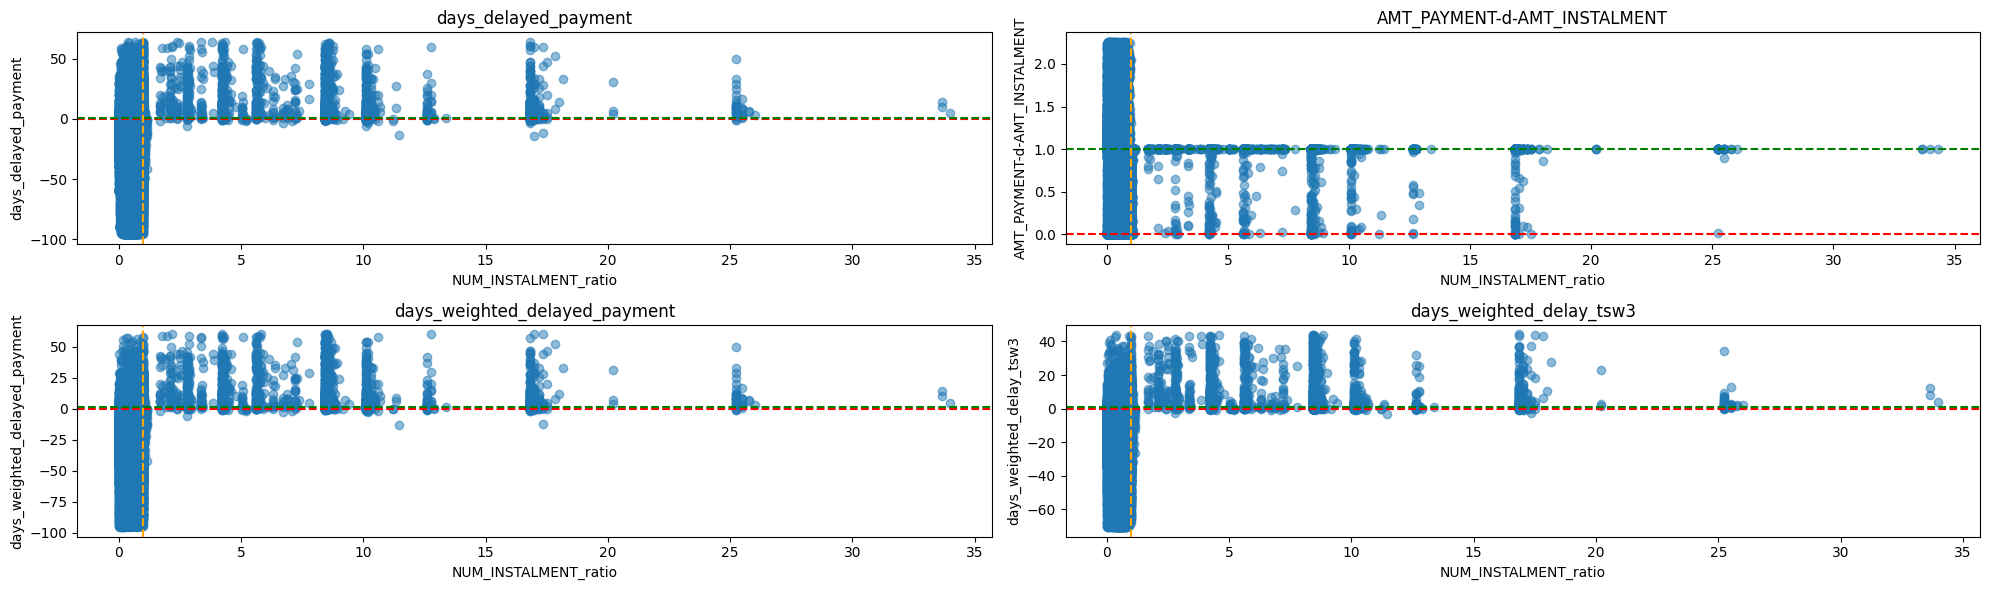

In [115]:
x_col = "NUM_INSTALMENT_ratio"
numeric_cols = ["days_delayed_payment", "AMT_PAYMENT-d-AMT_INSTALMENT", "days_weighted_delayed_payment", "days_weighted_delay_tsw3"]

n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3 * n_rows))  
axes = axes.flatten() 

for ax, y_col in zip(axes, numeric_cols):
    _tmp = tmp.dropna().sample(n=1000000, random_state=42)

    Q1 = _tmp[y_col].quantile(0.05)
    Q3 = _tmp[y_col].quantile(0.95)
    IQR = Q3 - Q1
    _tmp = _tmp[(_tmp[y_col] >= (Q1 - 1.5 * IQR)) & (_tmp[y_col] <= (Q3 + 1.5 * IQR))] # không phải outlier nhưng tạm thời lấy khoảng tin cậy 95% để dễ nhìn
    ax.scatter(_tmp[x_col], _tmp[y_col], alpha=0.5)
    ax.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
    ax.axhline(y=1, color='green', linestyle='--', linewidth=1.5)
    ax.axvline(x=1, color='orange', linestyle='--', linewidth=1.5)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f"{y_col}")

for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

* NUM_INSTALMENT_ratio > 1 delay rất nhiều
* NUM_INSTALMENT_ratio > 1 trả góp nhỏ hơn hoặc bằng INSTALMENT ban đầu (có thể là do parameter)

## xét số lượng payment cho một khoản vay

In [116]:
payment_counts = tmp.groupby("SK_ID_PREV").size().reset_index(name="count")

In [117]:
agg_cols = {
    "days_delayed_payment": ["mean", "max"],
    "days_weighted_delayed_payment": ["mean", "max"],
    "days_weighted_delay_tsw3": ["mean", "max"],
    "AMT_PAYMENT-d-AMT_INSTALMENT": ["mean", "max", "std"],
    "CNT_PAYMENT": "first"
}
payment_stats = tmp.groupby("SK_ID_PREV").agg(agg_cols).reset_index()
payment_stats.columns = ["_".join(col).rstrip("_") for col in payment_stats.columns]

In [118]:
payment_counts = payment_counts.merge(payment_stats, on="SK_ID_PREV", how="left")

In [119]:
payment_counts["CNT_PAYMENT_ratio"] = payment_counts["count"] / payment_counts["CNT_PAYMENT_first"]

In [120]:
payment_counts["AMT_PAYMENT-d-AMT_INSTALMENT_std"].max() # không phải là outlier, nhưng tạm thời lấy khoảng tin cậy 95% để dễ xem biểu đồ 

np.float64(96799.49999913912)

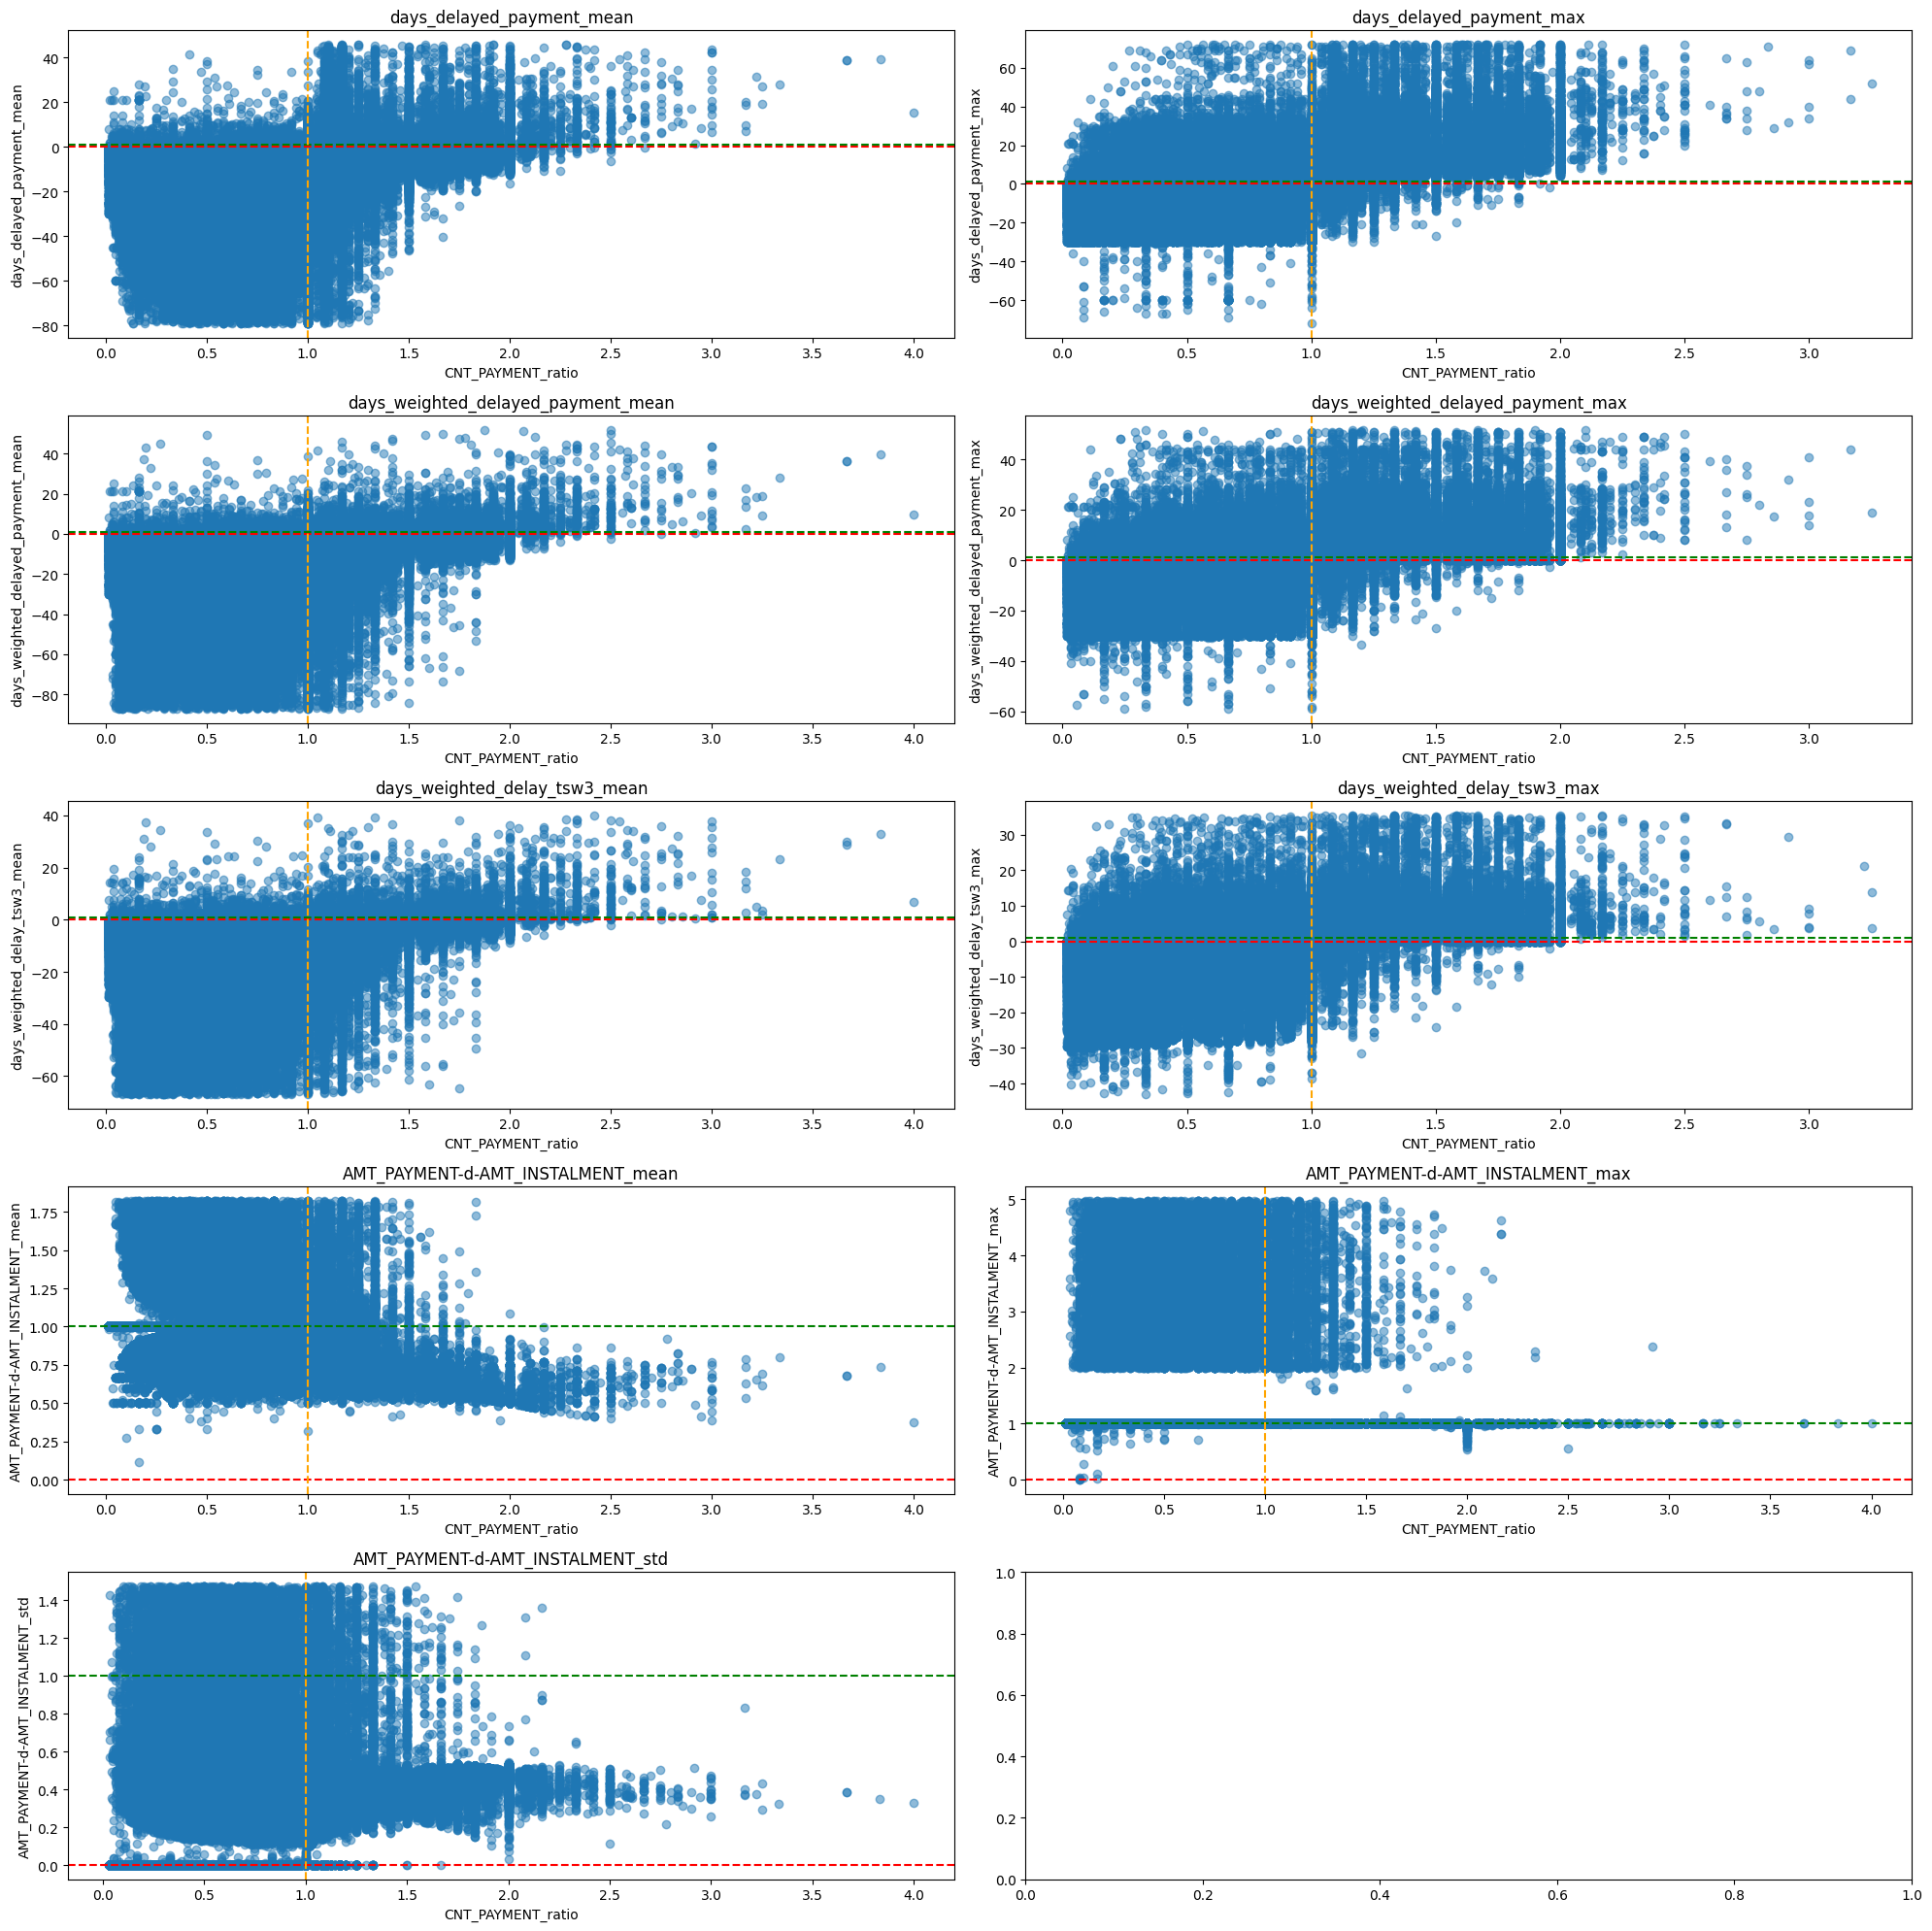

In [121]:
x_col = "CNT_PAYMENT_ratio"
numeric_cols = ["days_delayed_payment_mean", "days_delayed_payment_max", "days_weighted_delayed_payment_mean", "days_weighted_delayed_payment_max", "days_weighted_delay_tsw3_mean", "days_weighted_delay_tsw3_max", "AMT_PAYMENT-d-AMT_INSTALMENT_mean",
                "AMT_PAYMENT-d-AMT_INSTALMENT_max", "AMT_PAYMENT-d-AMT_INSTALMENT_std"]

fig, axes = plt.subplots((len(numeric_cols) // 2) + 1, 2, figsize=(20, 5 * (len(numeric_cols) // 2)))  
axes = axes.flatten()

for ax, y_col in zip(axes, numeric_cols):
    _tmp = payment_counts[[x_col, y_col]].dropna()

    Q1 = _tmp[y_col].quantile(0.05)
    Q3 = _tmp[y_col].quantile(0.95)
    IQR = Q3 - Q1
    _tmp = _tmp[(_tmp[y_col] >= (Q1 - 1.5 * IQR)) & (_tmp[y_col] <= (Q3 + 1.5 * IQR))]
    ax.scatter(_tmp[x_col], _tmp[y_col], alpha=0.5)
    ax.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
    ax.axhline(y=1, color='green', linestyle='--', linewidth=1.5)
    ax.axvline(x=1, color='orange', linestyle='--', linewidth=1.5)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f"{y_col}")

plt.tight_layout()
plt.show()

* Trả nhiều lần có xu hướng delay nhiều hơn và xa ngày hết hạn hơn (delay > 0), ngược lại, trả góp gọn gàng hơn có xu hướng trả trước hạn (delay < 0)  có sự chuẩn bị tốt. (Lưu ý: bao gồm cả hồ sơ chưa đầy đủ do thời gian xét duyệt).
* Trả góp gọn gàng ít lần có xu hướng trả nhiều tiền hơn (PAYMENT/INSTALMENT >= 1). Lý do có thể là rút ngắn thời gian trả góp, giảm lãi suất,..... Ngược lại, trả góp càng nhỏ giọt lại có xu hướng trả thiếu tiền, chia ra thành nhiều lần trả (PAYMENT/INSTALMENT < 1)
* Độ lệch chuẩn ratio:
* * Trả góp nhỏ giọt: ~0.3 - 0.5. Có sự chênh lệch tỉ lệ khá lớn và chỉ tập trung nhiều vào khoảng [0.3, 0.5], điều này chứng minh khoản tiền trả góp không ổn định (có khoản vay sẽ trả 99%/1%, có những khoản vay trả góp rải rác tỉ lệ 30%/30%/20%/20%...)
* * Trả góp gọn gàng: trải dài từ 0 - 1.5. Sự chênh lệch này đến từ việc trả quá số tiền quy định khiến độ lệch chuẩn lớn. Những điểm bằng 0 là trả góp tiêu dùng đều đặn

In [146]:
_keep_vars.update({"payment_counts"})
cache_clear()

# xét hành vi trả góp rủi ro / không rủi ro

In [123]:
tmp = pd.merge(tmp, train, on='SK_ID_CURR', how='left')

In [124]:
id = tmp[tmp["TARGET"] == 1]["SK_ID_CURR"].unique()

In [125]:
# SK_ID_CURR == 122418 là trường hợp đang xét
tmp[tmp["SK_ID_CURR"]==122418].sort_values(["DAYS_ENTRY_PAYMENT"], ascending=[True])

index  SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
13064037  13064037     2769417      122418                     1.0   
13064038  13064038     2769417      122418                     1.0   
13064039  13064039     2769417      122418                     1.0   
13064040  13064040     2769417      122418                     1.0   
13064041  13064041     2769417      122418                     1.0   
13064042  13064042     2769417      122418                     1.0   
13064043  13064043     2769417      122418                     1.0   
13064044  13064044     2769417      122418                     1.0   
13064045  13064045     2769417      122418                     1.0   
8659837    8659837     2154622      122418                     1.0   
8659838    8659838     2154622      122418                     1.0   
8659839    8659839     2154622      122418                     1.0   
8659840    8659840     2154622      122418                     1.0   
8659841    8659841     2154622      122418                     1.0   
8659843    8659843     2154622      122418                     1.0   
8659842    8659842     2154622      122418                     1.0   
8659845    8659845     2154622      122418                     1.0   
8659844    8659844     2154622      122418                     1.0   
8659846    8659846     2154622      122418                     1.0   
8659851    8659851     2154622      122418                     4.0   
8659854    8659854     2154622      122418                     2.0   
8659850    8659850     2154622      122418                     1.0   
8659848    8659848     2154622      122418                     1.0   
8659847    8659847     2154622      122418                     3.0   
8659853    8659853     2154622      122418                     7.0   
8659852    8659852     2154622      122418                     6.0   
8659849    8659849     2154622      122418                     5.0   
8659856    8659856     2154622      122418                     1.0   
8659855    8659855     2154622      122418                     1.0   
8659857    8659857     2154622      122418                     1.0   
8659858    8659858     2154622      122418                     1.0   
8659859    8659859     2154622      122418                     1.0   
8659860    8659860     2154622      122418                     1.0   
8659861    8659861     2154622      122418                     1.0   
8659862    8659862     2154622      122418                     1.0   
8659863    8659863     2154622      122418                     1.0   
8659864    8659864     2154622      122418                     1.0   
1193192    1193192     1152967      122418                     1.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
13064037                      1            -2759             -2759.0   
13064038                      2            -2729             -2741.0   
13064039                      3            -2699             -2717.0   
13064040                      4            -2669             -2675.0   
13064041                      5            -2639             -2646.0   
13064042                      6            -2609             -2625.0   
13064043                      7            -2579             -2583.0   
13064044                      8            -2549             -2560.0   
13064045                      9            -2519             -2525.0   
8659837                       2             -742              -756.0   
8659838                       1             -772              -756.0   
8659839                       3             -712              -729.0   
8659840                       2             -742              -729.0   
8659841                       3             -712              -697.0   
8659843                       3             -712              -690.0   
8659842                       4             -682              -690.0   
8659845                       4             -682          

"First few installments are more important than last installments. You know, it’s human nature. When loan applicant late once, he might be late from then. HC will want to make sure loan applicant is always on time from the beginning." (một số ít những khoản trả góp ban đầu quan trọng hơn những khoản cuối cùng. HC muốn make sure người vay sẽ luôn đúng hạn ngay từ đầu. nếu người vay đã muộn một lần thì khả năng cao các lần sau cũng sẽ muộn) -- https://www.kaggle.com/competitions/home-credit-default-risk/discussion/63032



TARGET
0.0    Axes(0.125,0.11;0.775x0.77)
1.0    Axes(0.125,0.11;0.775x0.77)
Name: days_delayed_payment, dtype: object

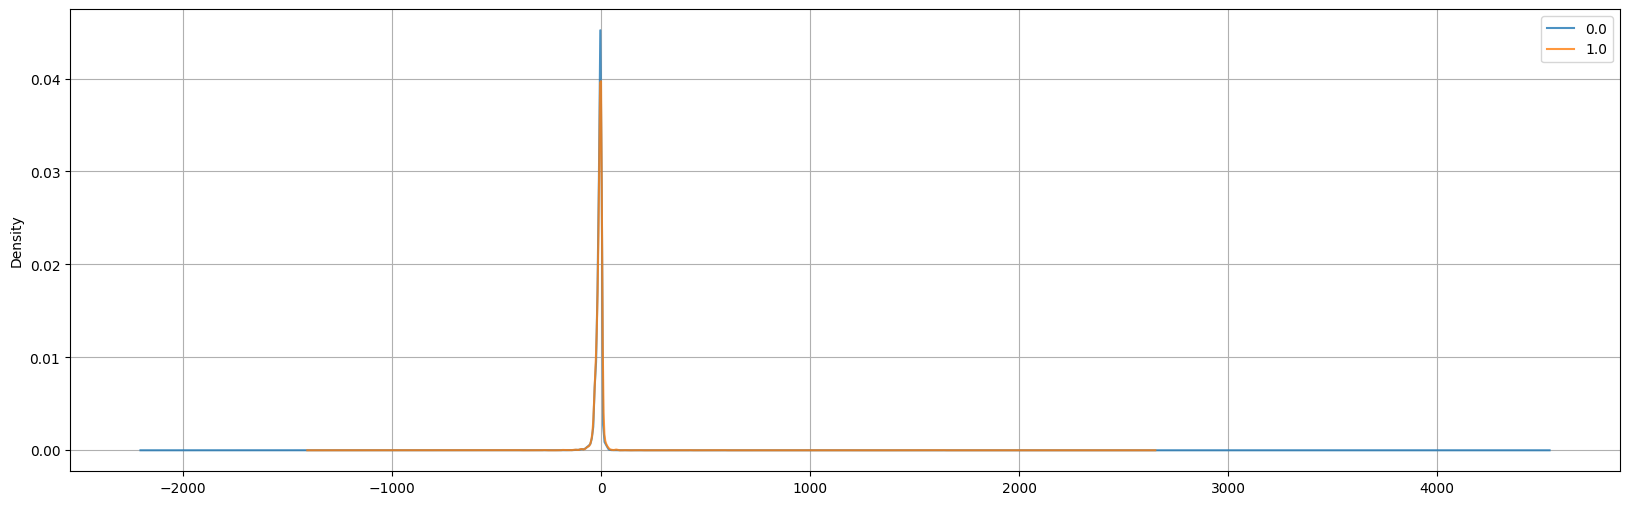

In [135]:
plt.figure(figsize=(20, 6))
tmp.sample(n=100000, random_state=42).groupby("TARGET")["days_delayed_payment"].plot(kind='kde', legend=True, alpha=0.8, grid=True)

TARGET
0.0    Axes(0.125,0.11;0.775x0.77)
1.0    Axes(0.125,0.11;0.775x0.77)
Name: AMT_PAYMENT-d-AMT_INSTALMENT, dtype: object

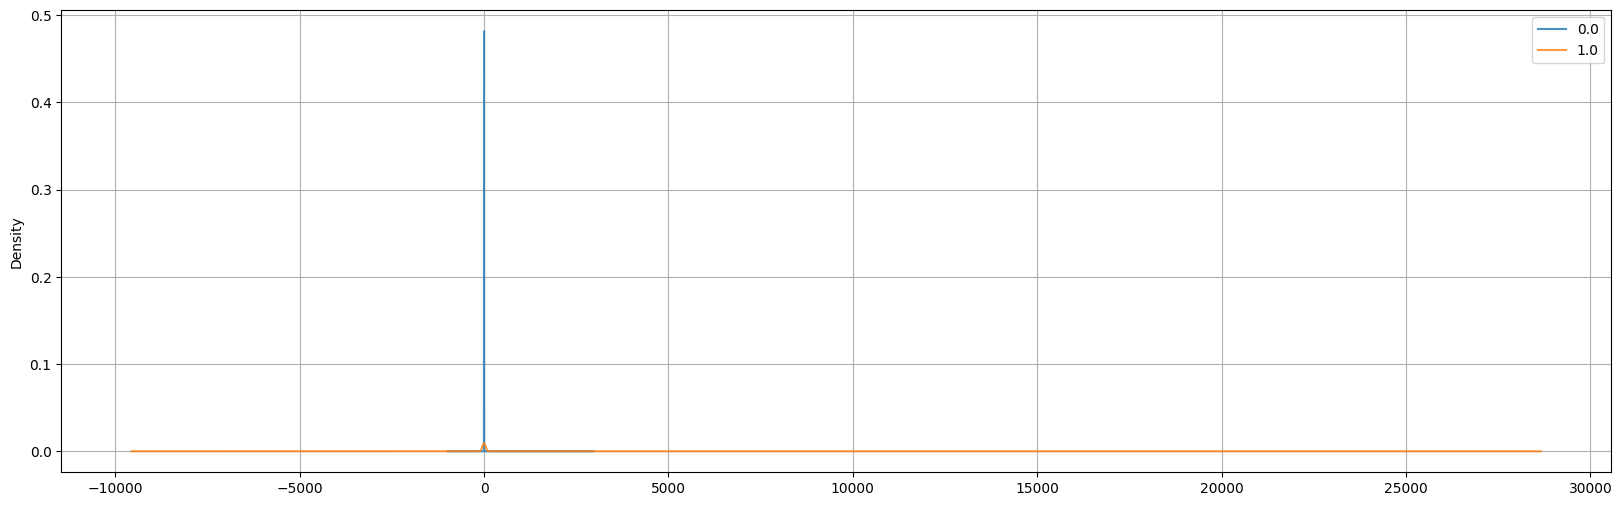

In [136]:
plt.figure(figsize=(20, 6))
tmp.sample(n=100000, random_state=42).groupby("TARGET")["AMT_PAYMENT-d-AMT_INSTALMENT"].plot(kind='kde', legend=True, alpha=0.8, grid=True)

* TARGET = 1 (hồ sơ rủi ro) có xu hướng trả rất nhiều so với ban đầu (trả dồn vào một vài lần), không ổn định vì miền giá trị (màu cam) trải dài
* TARGET = 0 (hồ sơ không rủi ro) có xu hướng trả trong khoảng xung quanh INSTALMENT, ổn định vì miền giá trị (màu xanh) ngắn

số tiền thực tế phải trả > số tiền vay tín dụng => tính được lãi suất interest rate (trong prev thì lãi suất đã bị chuẩn hóa)

TARGET
0.0    Axes(0.125,0.11;0.775x0.77)
1.0    Axes(0.125,0.11;0.775x0.77)
Name: NUM_INSTALMENT_ratio, dtype: object

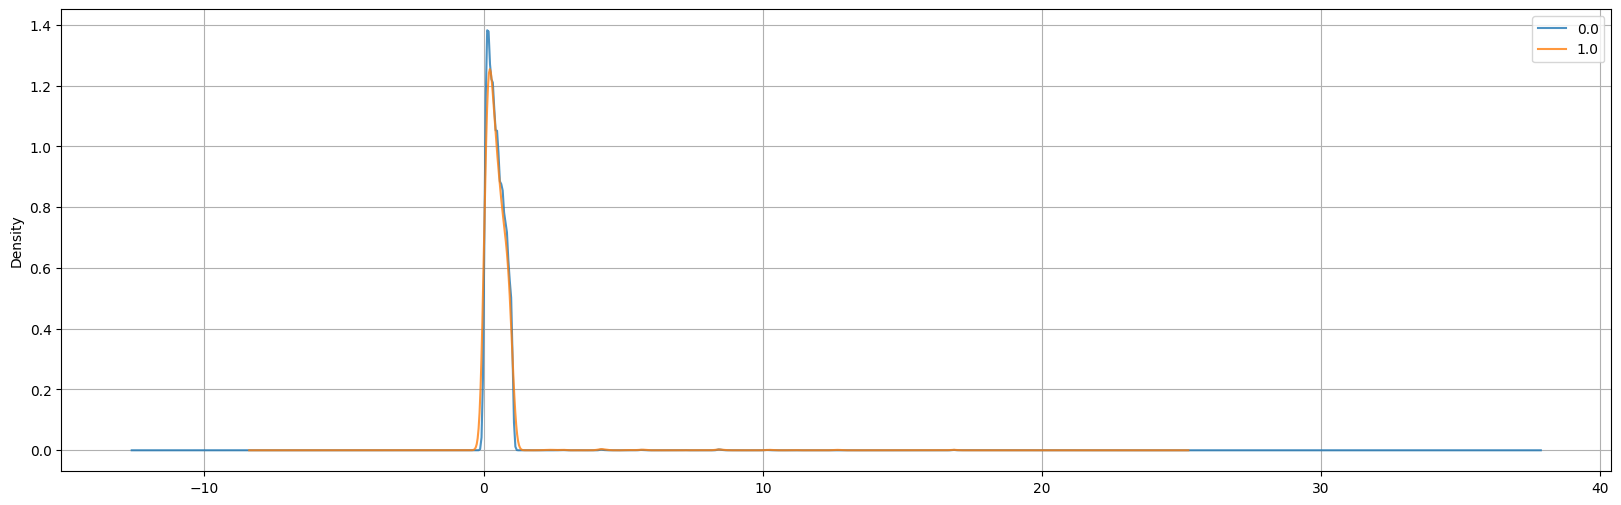

In [144]:
plt.figure(figsize=(20, 6))
tmp.sample(n=100000, random_state=42).groupby("TARGET")["NUM_INSTALMENT_ratio"].plot(kind='kde', legend=True, alpha=0.8, grid=True)

* Phân bổ đều chủ yếu trong khoảng (0, 1)
* Xuất hiện những ratio > 1 (version thay đổi, NUM_INSTALMENT có dạng 10x)

In [154]:
payment_counts = payment_counts.merge(prev[["SK_ID_PREV", "SK_ID_CURR"]], on="SK_ID_PREV", how="left")

In [158]:
payment_counts = payment_counts.merge(train, on="SK_ID_CURR", how="left")

TARGET
0.0    Axes(0.125,0.11;0.775x0.77)
1.0    Axes(0.125,0.11;0.775x0.77)
Name: CNT_PAYMENT_ratio, dtype: object

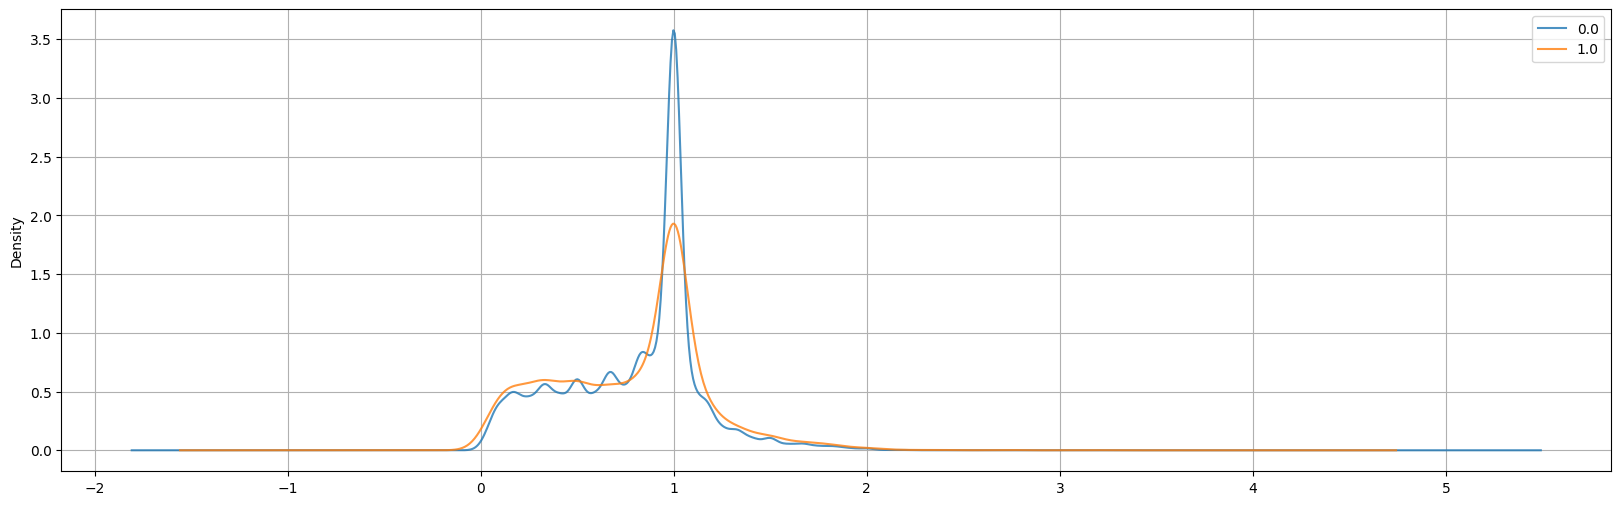

In [161]:
plt.figure(figsize=(20, 6))
payment_counts.sample(n=100000, random_state=42).groupby("TARGET")["CNT_PAYMENT_ratio"].plot(kind='kde', legend=True, alpha=0.8, grid=True) # .sample(n=100000, random_state=42)

* Hồ sơ không rủi ro có xu hướng trả góp đúng số lần quy định hơn
* Tỉ lệ trả nhiều hơn hay ít hơn CNT_PAYMENT khá đồng đều

In [181]:
cache_clear()

# xét thể loại trả góp (tín dụng hoặc trả góp tiêu dùng)

* NUM_INSTALMENT_VERSION = 0 <=> Revolving loans (Vay tín dụng xoay vòng, do vậy số tiền phải trả hàng tháng là không cố định. Tuy nhiên người dùng có xu hướng tiêu dùng dưới hoặc bằng hạn mức tín dụng, do vậy nên chỉ cần trả số tiền lãi tối thiểu)
* Số lượng vay tín dụng xoay vòng trong bộ dữ liệu này khá ít (vì là của Home Credit - Việt Nam và các nước DNA)

* instalment[AMT_INSTALMENT] <=> prev[AMT_ANNUITY]

In [204]:
tmp_2.head()

index  SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
0      0     1000001      158271                     1.0   
1      1     1000001      158271                     2.0   
2      2     1000002      101962                     1.0   
3      3     1000002      101962                     1.0   
4      4     1000002      101962                     1.0   

   NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  \
0                      1             -268              -294.0        6404.310   
1                      2             -238              -244.0       62039.115   
2                      1            -1600             -1611.0        6264.000   
3                      2            -1570             -1575.0        6264.000   
4                      3            -1540             -1559.0        6264.000   

   AMT_PAYMENT  days_delayed_payment  AMT_PAYMENT-s-AMT_INSTALMENT  \
0     6404.310                 -26.0                           0.0   
1    62039.115                  -6.0                           0.0   
2     6264.000                 -11.0                           0.0   
3     6264.000                  -5.0                           0.0   
4     6264.000                 -19.0                           0.0   

   AMT_PAYMENT-d-AMT_INSTALMENT  days_weighted_delayed_payment  \
0                           1.0                          -26.0   
1                           1.0                           -6.0   
2                           1.0                          -11.0   
3                           1.0                           -5.0   
4                           1.0                          -19.0   

   days_weighted_delay_tsw3  DPD   DBD  CNT_PAYMENT  NUM_INSTALMENT_ratio  \
0                  -23.7068  0.0  26.0         12.0              0.083333   
1                   -5.5608  0.0   6.0         12.0              0.166667   
2                   -5.6837  0.0  11.0          6.0              0.166667   
3                   -2.6375  0.0   5.0          6.0              0.333333   
4                  -10.1137  0.0  19.0          6.0              0.500000   

   TARGET  revolving_loan  
0     0.0            True  
1     0.0            True  
2     NaN            True  
3     NaN            True  
4     NaN            True

In [201]:
tmp_2 = tmp.copy()

In [211]:
tmp_2["revolving_loan"] = tmp_2["NUM_INSTALMENT_VERSION"] == 0

revolving_loan
False    Axes(0.125,0.11;0.775x0.77)
True     Axes(0.125,0.11;0.775x0.77)
Name: AMT_PAYMENT-d-AMT_INSTALMENT, dtype: object

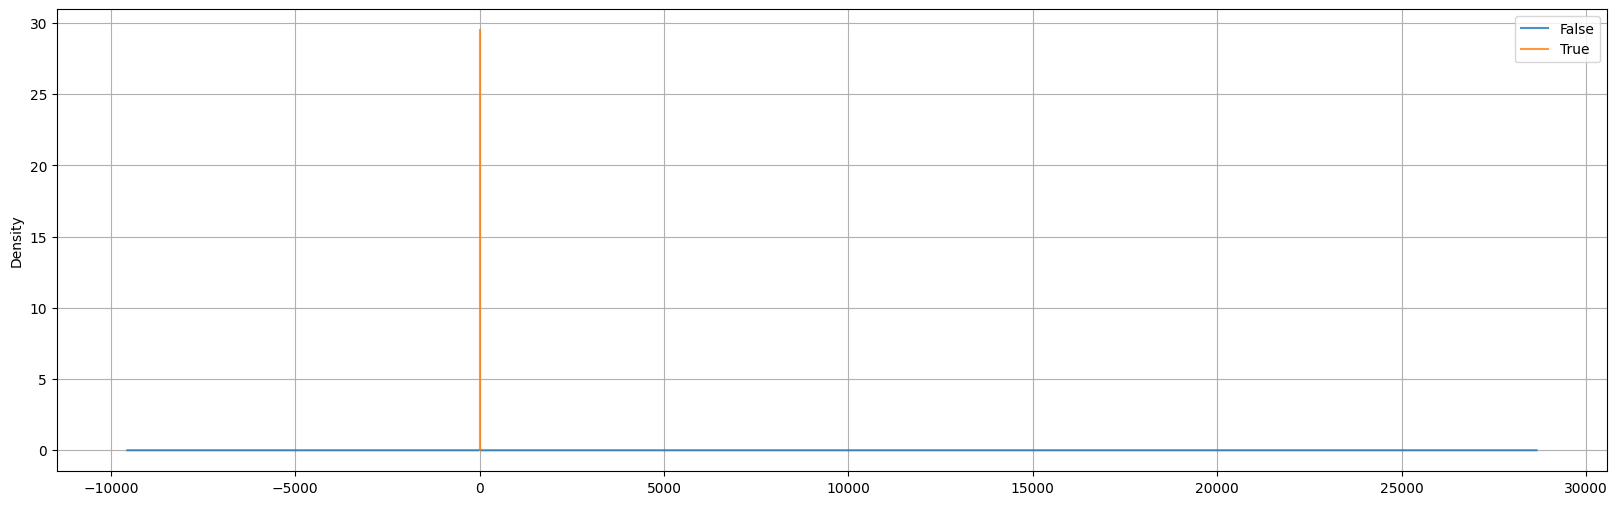

In [212]:
plt.figure(figsize=(20, 6))
tmp_2.sample(n=100000, random_state=42).groupby("revolving_loan")["AMT_PAYMENT-d-AMT_INSTALMENT"].plot(kind='kde', legend=True, alpha=0.8, grid=True)

* Trả góp cho khoản vay tín dụng có xu hướng không đồng đều, ngược lại trả góp tiêu dùng

revolving_loan
False    Axes(0.125,0.11;0.775x0.77)
Name: NUM_INSTALMENT_ratio, dtype: object

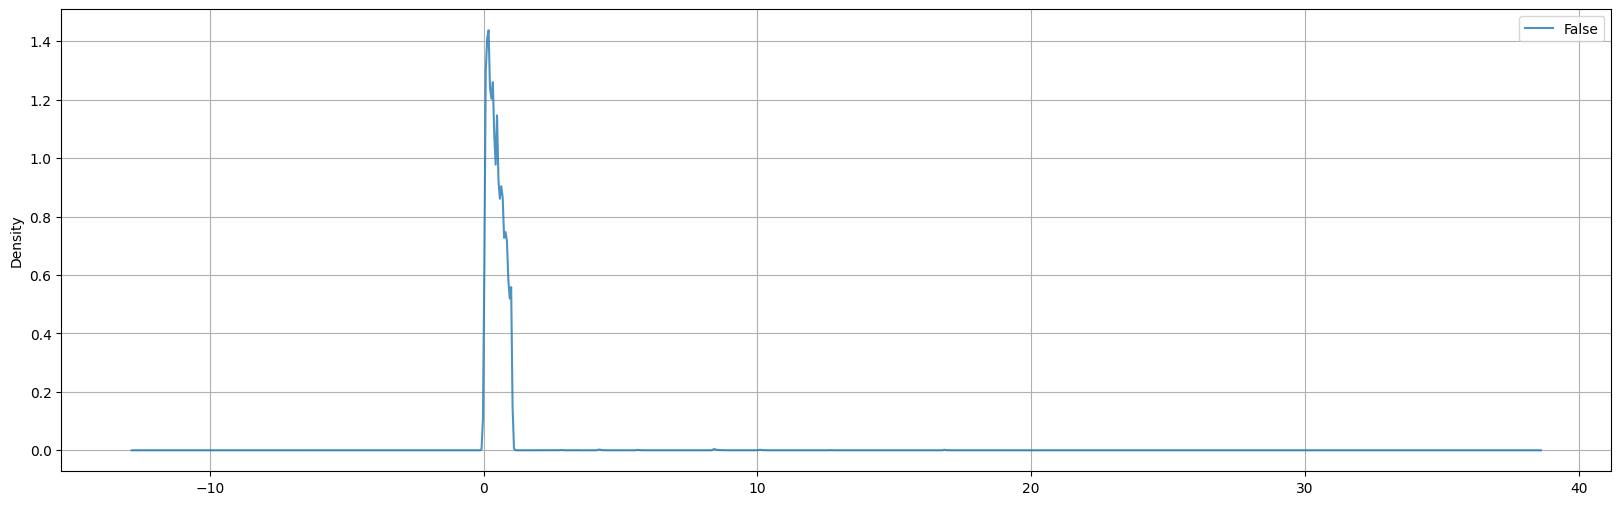

In [214]:
plt.figure(figsize=(20, 6))
tmp_2.sample(n=1000000, random_state=42).dropna().groupby("revolving_loan")["NUM_INSTALMENT_ratio"].plot(kind='kde', legend=True, alpha=0.8, grid=True) # NUM_INSTALMENT_ratio

* Trả góp không có số ngày phải trả (CNT_PAYMENT = null)